In [1]:
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

In [10]:
df=pd.read_excel("C:\\Users\\srivi\\Downloads\\Election_Data+%281%29.xlsx")

In [11]:
df.head(5)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [12]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [13]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [14]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [15]:
dups=df.duplicated().sum()
dups

8

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
dups=df.duplicated().sum()
dups

0

In [25]:
df.shape

(1517, 9)

In [106]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [27]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541
std,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [28]:
df['vote'].unique()

array(['Labour', 'Conservative'], dtype=object)

In [29]:
df['age'].unique()

array([43, 36, 35, 24, 41, 47, 57, 77, 39, 70, 66, 59, 51, 79, 37, 38, 53,
       44, 60, 56, 61, 55, 62, 76, 27, 52, 48, 72, 42, 54, 50, 46, 33, 58,
       64, 32, 71, 28, 34, 68, 67, 88, 40, 78, 65, 74, 82, 49, 84, 81, 45,
       69, 31, 63, 89, 83, 29, 92, 73, 75, 26, 90, 25, 80, 30, 86, 85, 87,
       93, 91], dtype=int64)

In [30]:
df['economic.cond.national'].unique()

array([3, 4, 2, 1, 5], dtype=int64)

In [31]:
df['economic.cond.household'].unique()

array([3, 4, 2, 1, 5], dtype=int64)

In [32]:
df['Blair'].unique()

array([4, 5, 2, 1, 3], dtype=int64)

In [33]:
df['Hague'].unique()

array([1, 4, 2, 5, 3], dtype=int64)

In [34]:
df['Europe'].unique()

array([ 2,  5,  3,  4,  6, 11,  1,  7,  9, 10,  8], dtype=int64)

In [35]:
df['political.knowledge'].unique()

array([2, 0, 3, 1], dtype=int64)

In [36]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [37]:
df.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

In [38]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [39]:
df.dtypes.value_counts()

int64     7
object    2
dtype: int64

In [40]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [41]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




<AxesSubplot:>

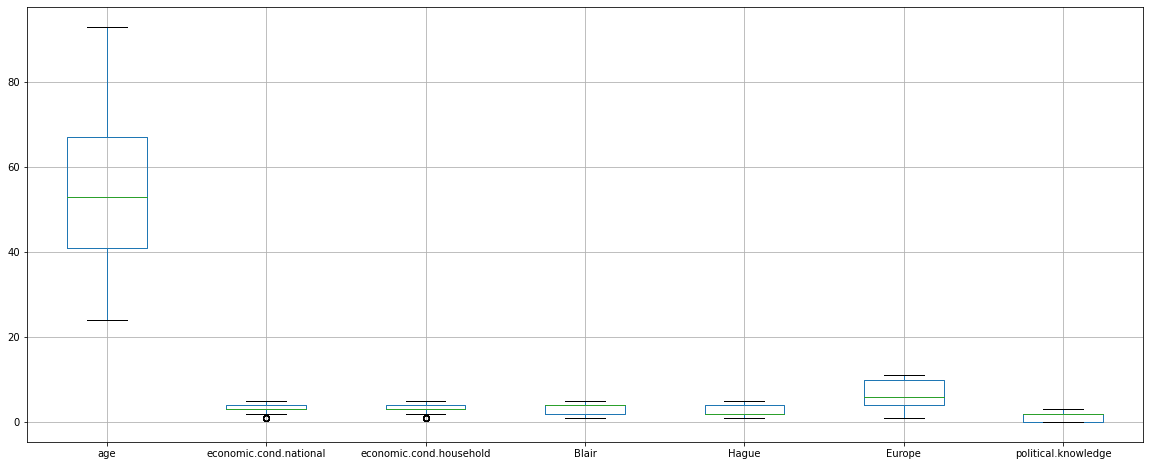

In [42]:
plt.figure(figsize=(20,8))
df.boxplot()

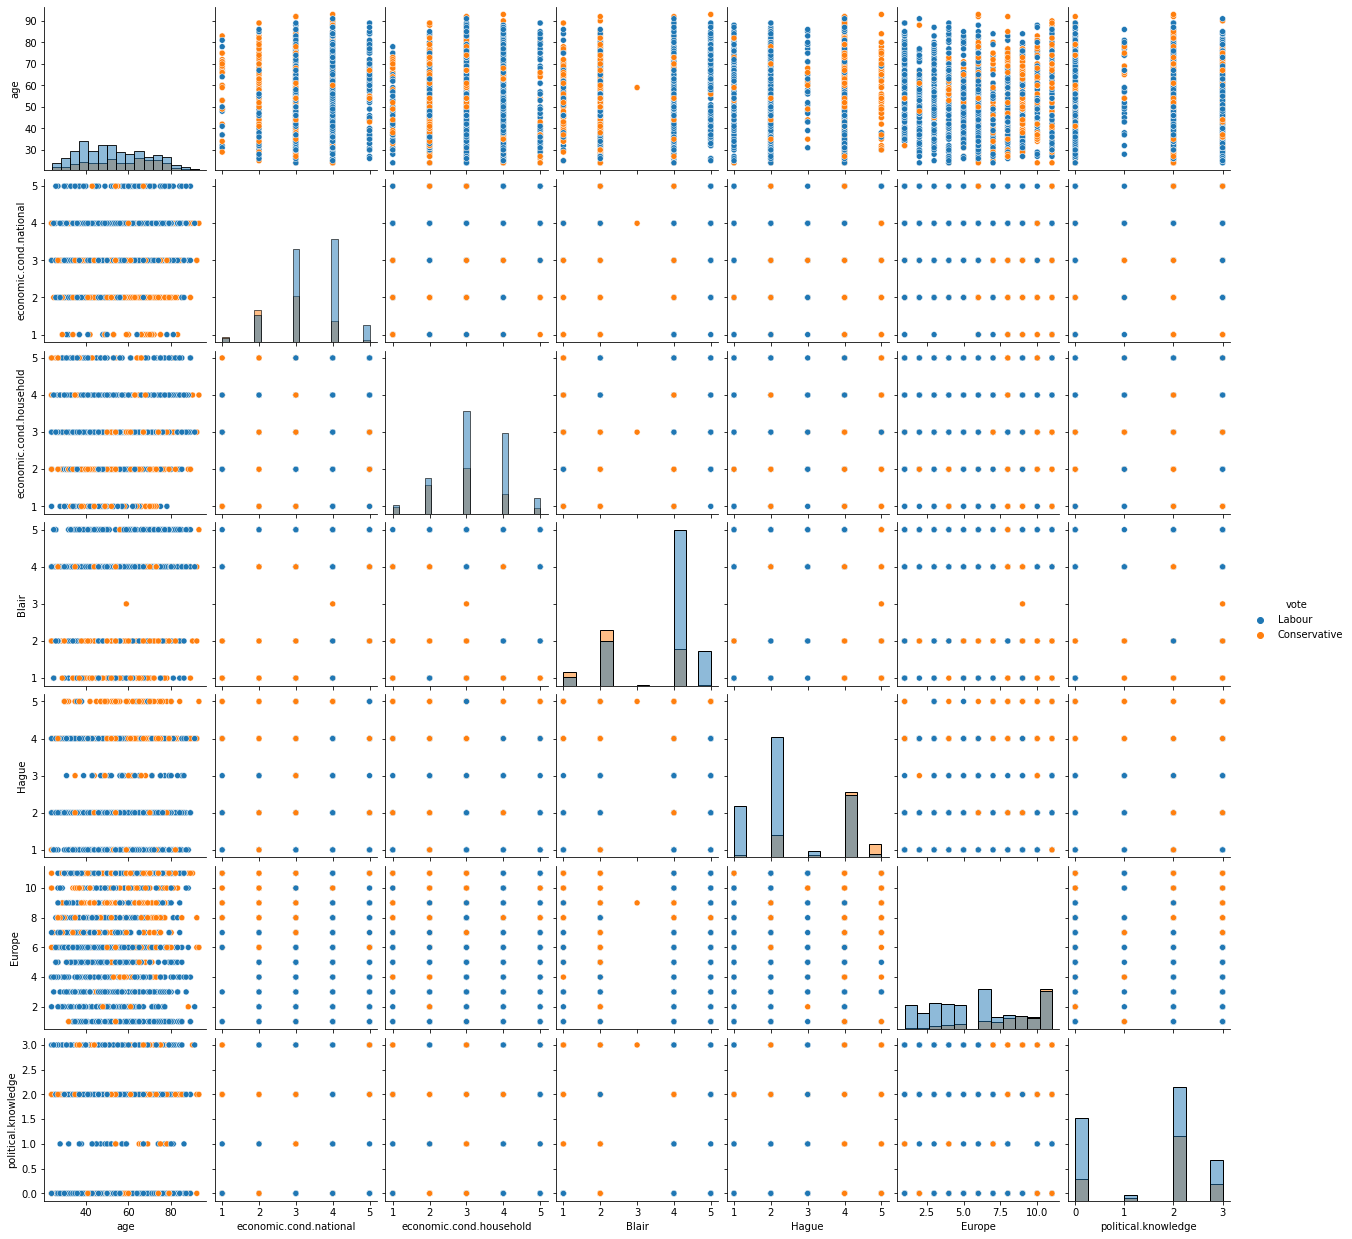

In [43]:
sns.pairplot(df ,diag_kind='hist',hue='vote');

In [44]:
df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


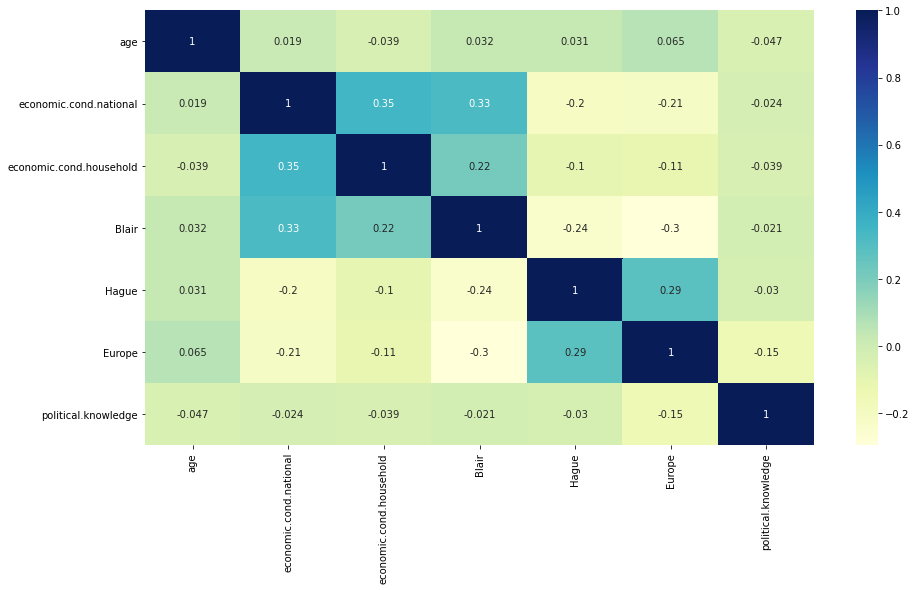

In [45]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [46]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [47]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 97.8 KB


In [49]:
df.var()

vote                         0.211421
age                        246.544655
economic.cond.national       0.777558
economic.cond.household      0.866890
Blair                        1.380089
Hague                        1.519005
Europe                      10.883687
political.knowledge          1.175961
gender                       0.249099
dtype: float64

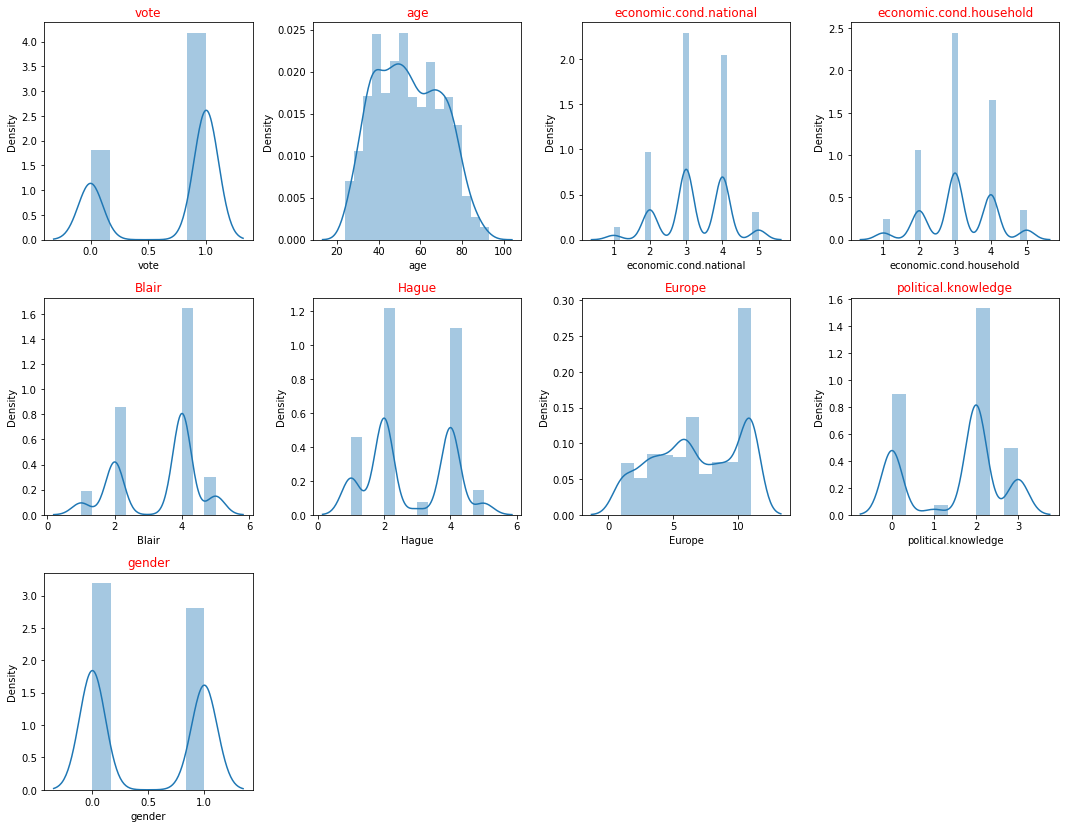

In [50]:
data_plot=df
fig=plt.figure(figsize=(15,15))
for i in range (0,len(df.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(df[df.columns[i]],hist=True)
    ax.set_title(df.columns[i],color='Red')
plt.tight_layout()
plt.show()

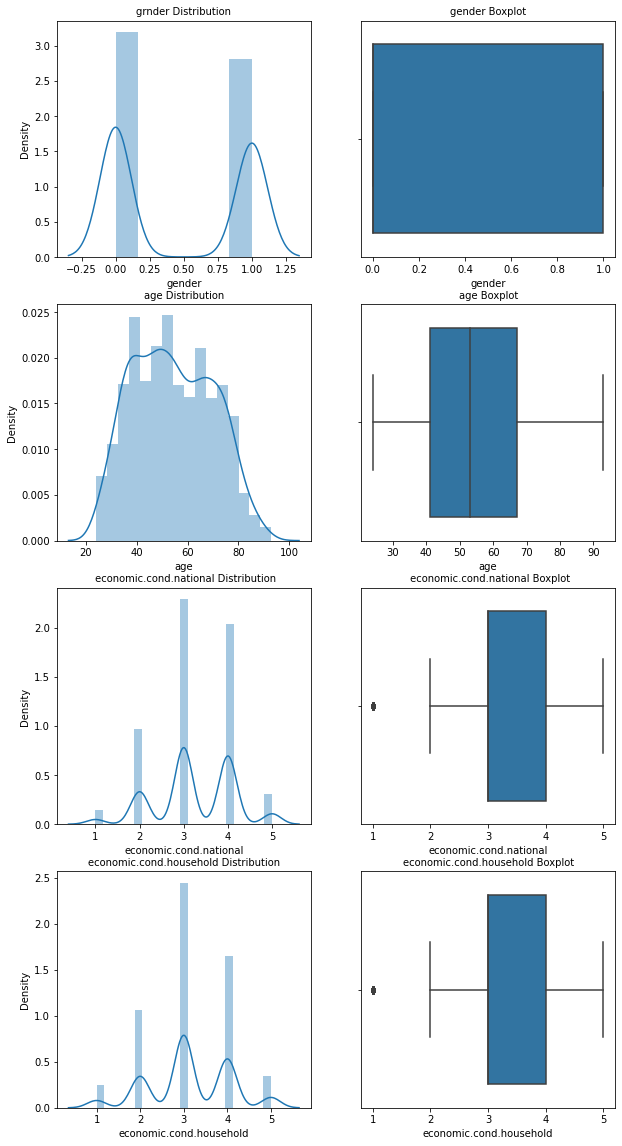

In [51]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['gender'] , ax=axes[0][0])
a.set_title("grnder Distribution",fontsize=10)

a = sns.boxplot(df['gender'] , orient = "v" , ax=axes[0][1])
a.set_title("gender Boxplot",fontsize=10)

a = sns.distplot(df['age'],ax=axes[1][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'],orient= "v",ax=axes[1][1])
a.set_title("age Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.national'] , ax=axes[2][0])
a.set_title(" economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'],orient = "v" , ax=axes[2][1])
a.set_title(" economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.household'],ax=axes[3][0])
a.set_title("economic.cond.household Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.household'],orient = "v" , ax=axes[3][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)

plt.show()

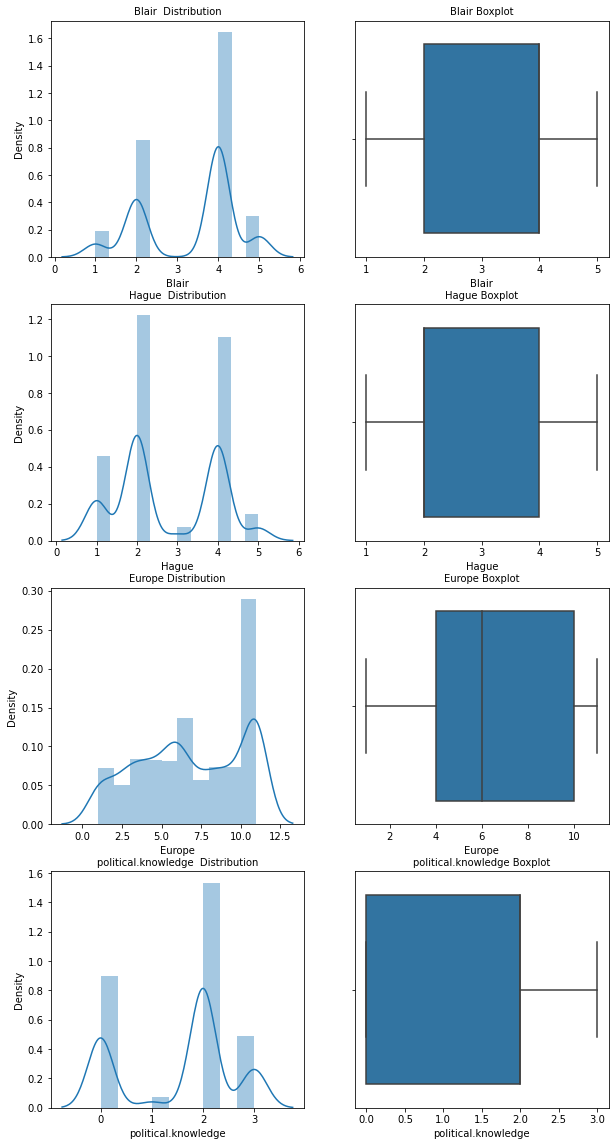

In [52]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['Blair'],ax=axes[0][0])
a.set_title("Blair  Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] ,orient = "v" , ax=axes[0][1])
a.set_title("Blair Boxplot",fontsize=10)

a = sns.distplot(df['Hague'],ax=axes[1][0])
a.set_title("Hague  Distribution",fontsize=10)

a = sns.boxplot(df['Hague'],orient= "v",ax=axes[1][1])
a.set_title("Hague Boxplot",fontsize=10)


a = sns.distplot(df['Europe'] , ax=axes[2][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'],orient = "v" , ax=axes[2][1])
a.set_title("Europe Boxplot",fontsize=10)


a = sns.distplot(df['political.knowledge'],ax=axes[3][0])
a.set_title("political.knowledge  Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'],orient = "v" , ax=axes[3][1])
a.set_title("political.knowledge Boxplot",fontsize=10)

plt.show()


In [53]:
print(num)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [54]:
print(cat)

['vote', 'gender']


In [55]:
df['vote'].value_counts()

1    1057
0     460
Name: vote, dtype: int64

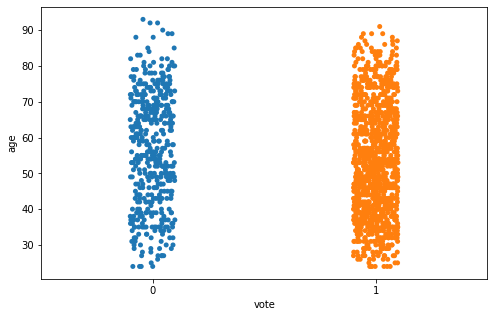

In [56]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['age'], jitter=True) 
plt.show()

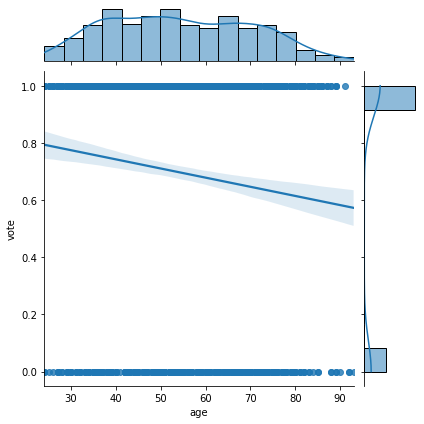

In [57]:
sns.jointplot(df['age'],df['vote'],kind='reg')
plt.show()

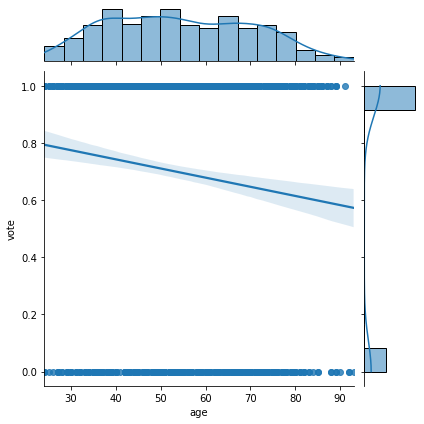

In [58]:
sns.jointplot(df['age'],df['vote'],kind='reg')
plt.show()

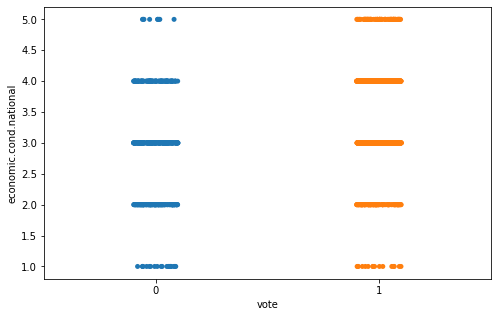

In [59]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['economic.cond.national'], jitter=True) 
plt.show()

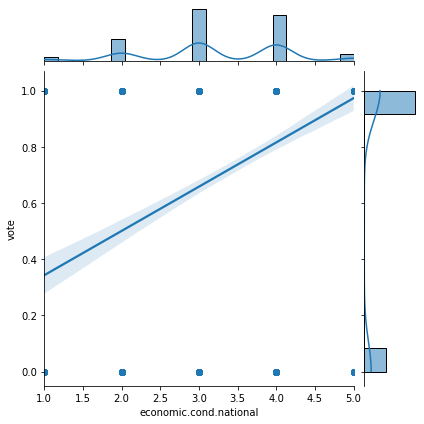

In [60]:
sns.jointplot(df['economic.cond.national'],df['vote'],kind='reg')
plt.show()

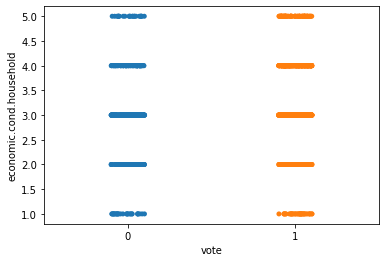

In [61]:
sns.stripplot(df['vote'], df['economic.cond.household'], jitter=True) 
plt.show()

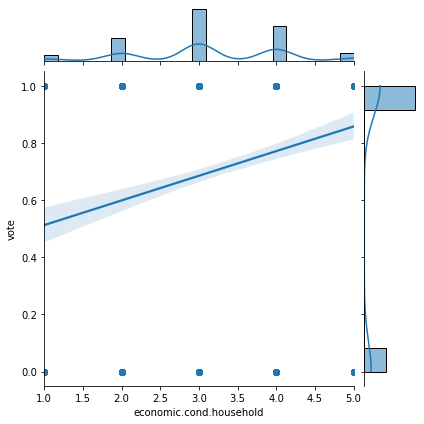

In [62]:
sns.jointplot(df['economic.cond.household'],df['vote'],kind='reg')
plt.show()

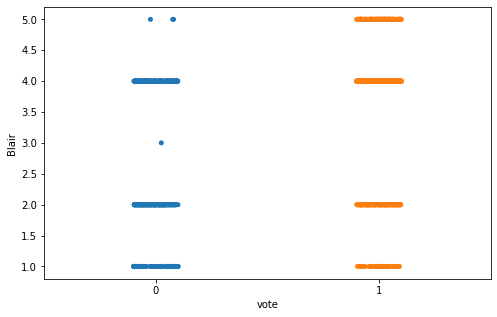

In [63]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['Blair'], jitter=True) 
plt.show()

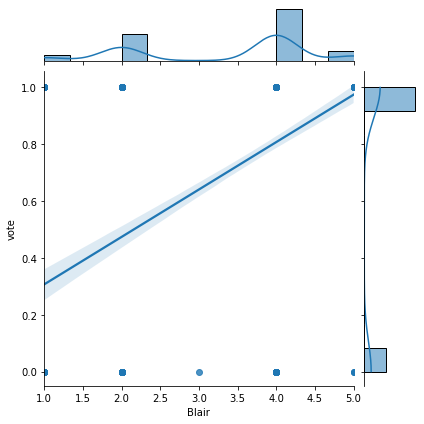

In [64]:
sns.jointplot(df['Blair'],df['vote'],kind='reg')
plt.show()

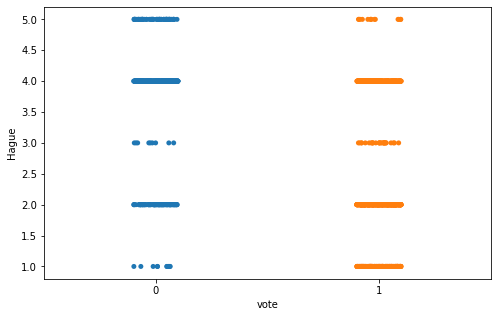

In [65]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['Hague'], jitter=True) 
plt.show()

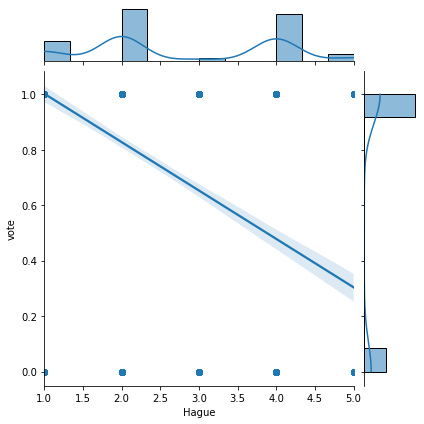

In [66]:
sns.jointplot(df['Hague'],df['vote'],kind='reg')
plt.show()

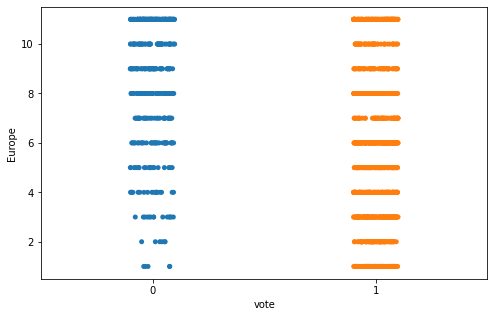

In [67]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['Europe'], jitter=True) 
plt.show()

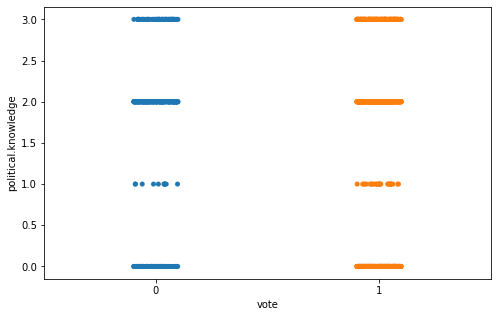

In [68]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['political.knowledge'], jitter=True) 
plt.show()


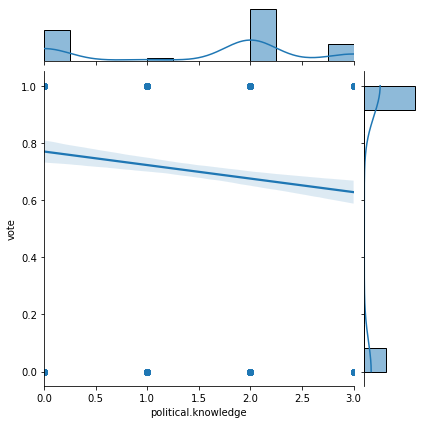

In [69]:
sns.jointplot(df['political.knowledge'],df['vote'],kind='reg')
plt.show()

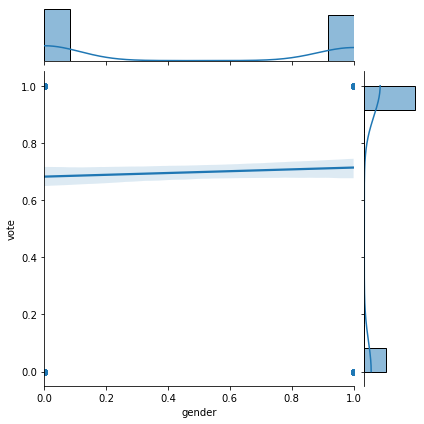

In [70]:
sns.jointplot(df['gender'],df['vote'],kind='reg')
plt.show()

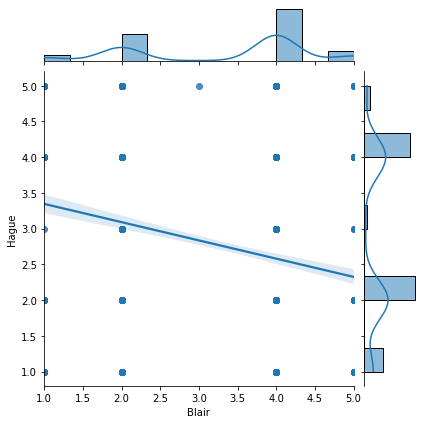

In [71]:
sns.jointplot(df['Blair'],df['Hague'],kind='reg')
plt.show()


<AxesSubplot:xlabel='vote', ylabel='count'>

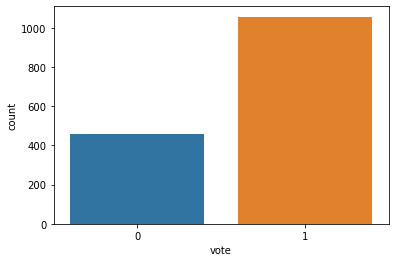

In [72]:
sns.countplot(x ='vote', data = df)

In [73]:
df.vote.value_counts()

1    1057
0     460
Name: vote, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

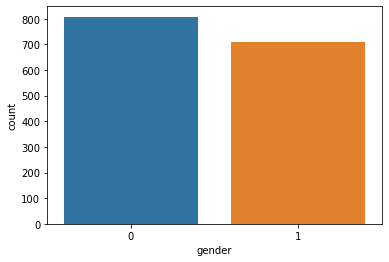

In [74]:
sns.countplot(x ='gender', data = df)

In [75]:
df.gender.value_counts()

0    808
1    709
Name: gender, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

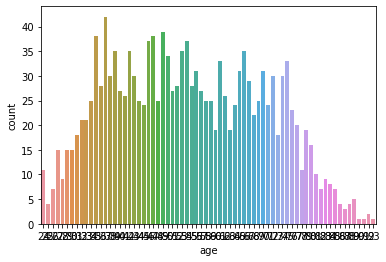

In [107]:
sns.countplot(x ='age', data = df)

<AxesSubplot:xlabel='Blair', ylabel='count'>

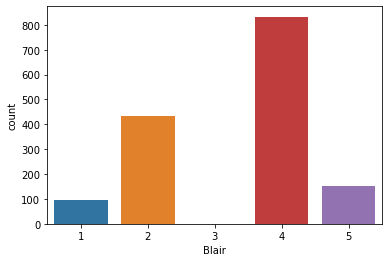

In [76]:
sns.countplot(x ='Blair', data = df)

In [77]:
df.Blair.value_counts()

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

<AxesSubplot:xlabel='Hague', ylabel='count'>

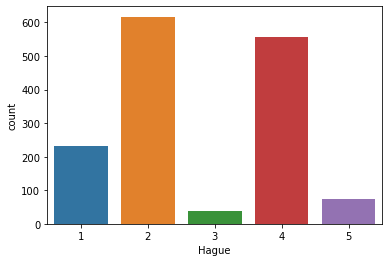

In [78]:
sns.countplot(x ='Hague', data = df)

In [79]:
df.Hague.value_counts()

2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64

<AxesSubplot:xlabel='political.knowledge', ylabel='count'>

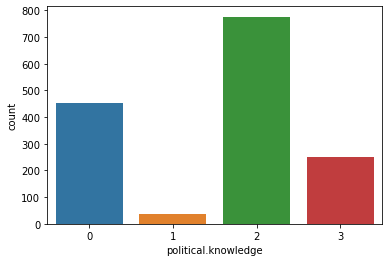

In [80]:
sns.countplot(x ='political.knowledge', data = df)

In [81]:
df['political.knowledge'].value_counts()

2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64

<AxesSubplot:xlabel='Europe', ylabel='count'>

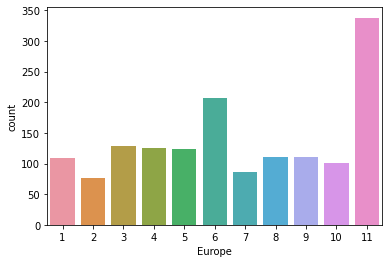

In [82]:
sns.countplot(x ='Europe', data = df)

In [83]:
df['Europe'].value_counts()

11    338
6     207
3     128
4     126
5     123
8     111
9     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64

<AxesSubplot:xlabel='economic.cond.household', ylabel='count'>

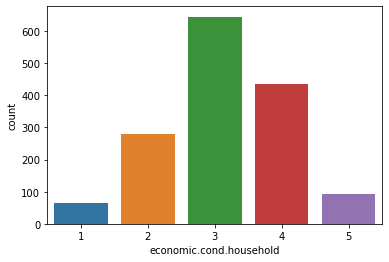

In [84]:
sns.countplot(x ='economic.cond.household', data = df)

In [85]:
df['economic.cond.household'].value_counts()

3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [86]:
df.kurtosis()

vote                      -1.267200
age                       -0.943708
economic.cond.national    -0.256575
economic.cond.household   -0.209035
Blair                     -1.060248
Hague                     -1.395161
Europe                    -1.236843
political.knowledge       -1.222260
gender                    -1.985477
dtype: float64

<AxesSubplot:xlabel='economic.cond.national', ylabel='count'>

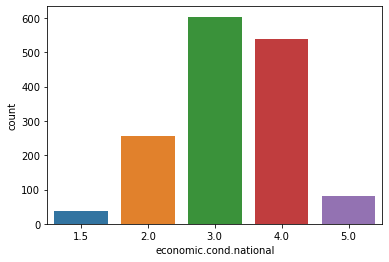

In [108]:
sns.countplot(x ='economic.cond.national', data = df)

<AxesSubplot:xlabel='age', ylabel='vote'>

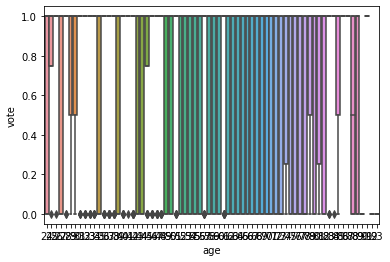

In [87]:
sns.boxplot(x = df['age'],y = df['vote'])

<AxesSubplot:xlabel='economic.cond.national', ylabel='count'>

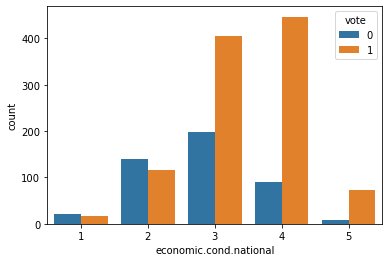

In [88]:
sns.countplot(x='economic.cond.national',hue='vote', data=df)

<AxesSubplot:xlabel='economic.cond.household', ylabel='count'>

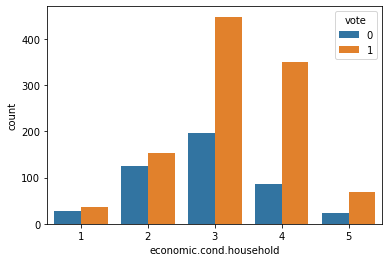

In [89]:
sns.countplot(x='economic.cond.household',hue='vote', data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

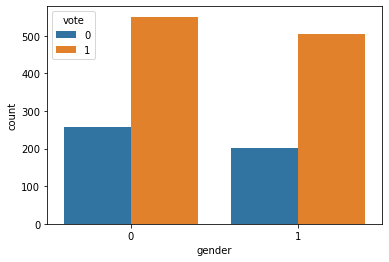

In [90]:
sns.countplot(x='gender',hue='vote', data=df)

<AxesSubplot:xlabel='political.knowledge', ylabel='count'>

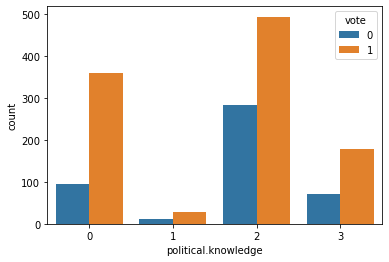

In [91]:
sns.countplot(x='political.knowledge',hue='vote', data=df)

<AxesSubplot:xlabel='Europe', ylabel='count'>

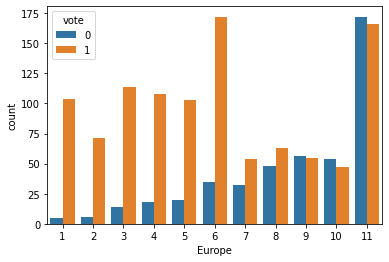

In [92]:
sns.countplot(x='Europe',hue='vote', data=df)

<AxesSubplot:xlabel='Hague', ylabel='count'>

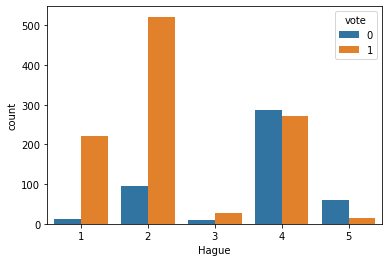

In [93]:
sns.countplot(x='Hague',hue='vote', data=df)

<AxesSubplot:xlabel='Blair', ylabel='count'>

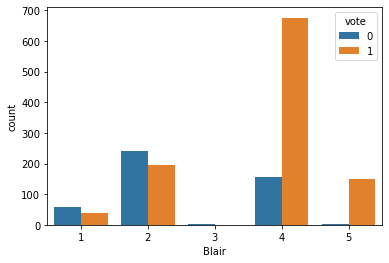

In [94]:
sns.countplot(x='Blair',hue='vote', data=df)

<AxesSubplot:>

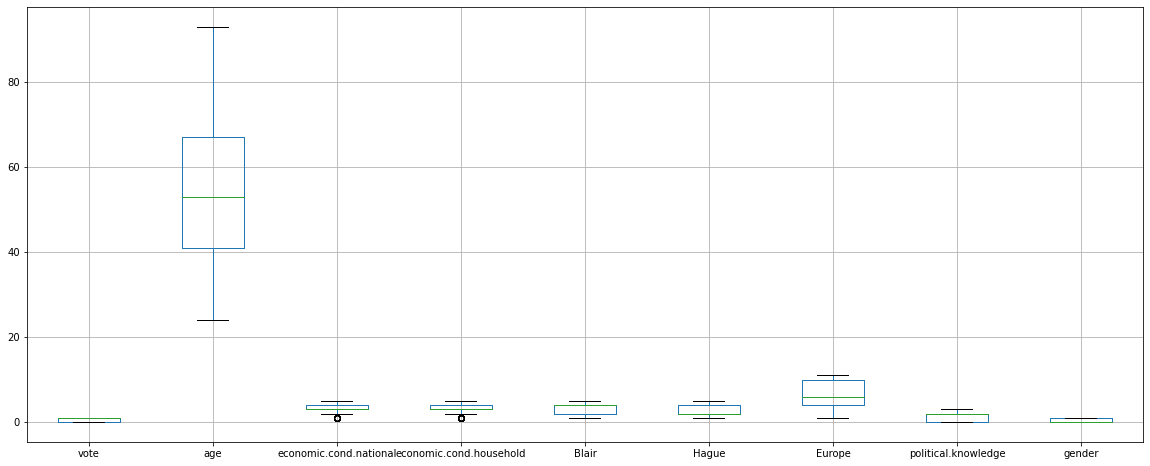

In [95]:
plt.figure(figsize=(20,8))
df.boxplot()

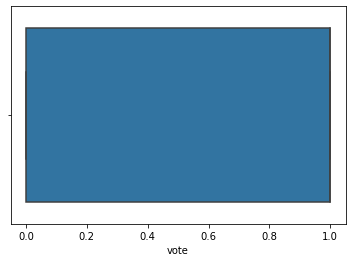

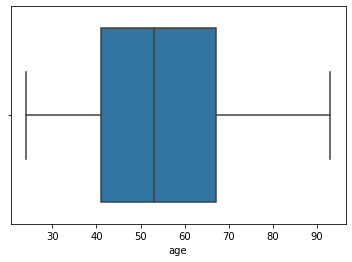

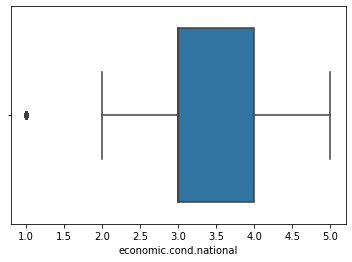

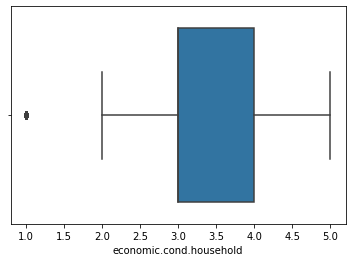

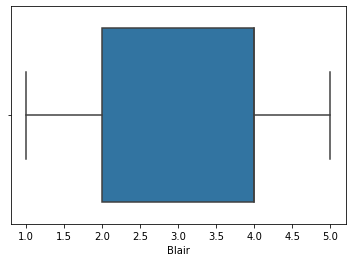

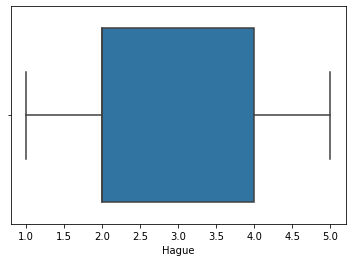

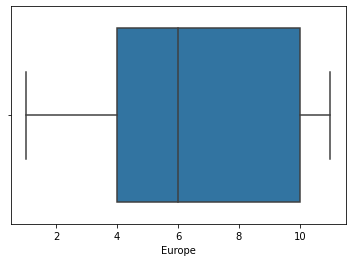

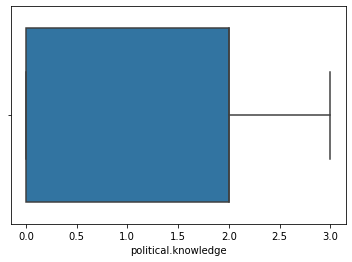

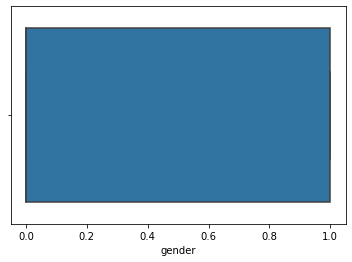

In [96]:
cols=['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'];

for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [97]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [98]:
for column in df[cols].columns:

    
    lr,ur=remove_outlier(df['economic.cond.national'])
    df['economic.cond.national']=np.where(df['economic.cond.national']>ur,ur,df['economic.cond.national'])
    df['economic.cond.national']=np.where(df['economic.cond.national']<lr,lr,df['economic.cond.national'])
     
    lr,ur=remove_outlier(df['economic.cond.household'])
    df['economic.cond.household']=np.where(df['economic.cond.household']>ur,ur,df['economic.cond.household'])
    df['economic.cond.household']=np.where(df['economic.cond.household']<lr,lr,df['economic.cond.household'])
    
    lr,ur=remove_outlier(df['political.knowledge'])
    df['political.knowledge']=np.where(df['political.knowledge']>ur,ur,df['political.knowledge'])
    df['political.knowledge']=np.where(df['political.knowledge']<lr,lr,df['political.knowledge'])
    

<AxesSubplot:>

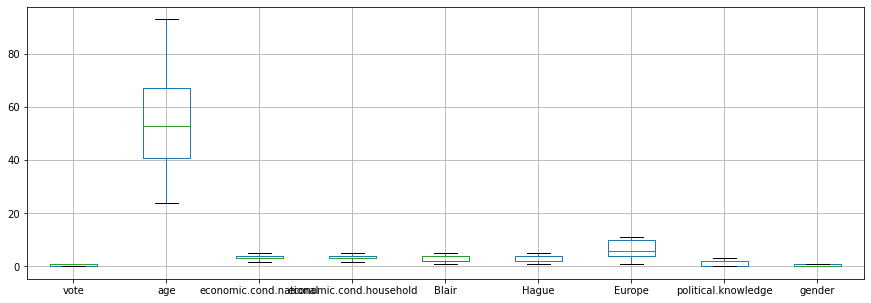

In [99]:
plt.figure(figsize=(15,5))
df.boxplot()

In [100]:
df['vote'].value_counts(normalize=True)

1    0.69677
0    0.30323
Name: vote, dtype: float64

<AxesSubplot:>

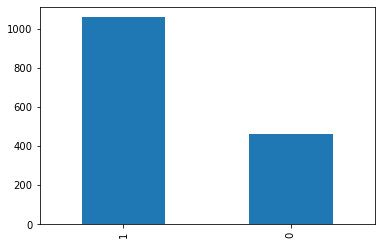

In [101]:
df['vote'].value_counts().plot(kind='bar')

In [102]:
df['vote'].unique()

array([1, 0], dtype=int8)

In [103]:
df.groupby('vote').mean()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,,,,,,,,
0,56.841304,2.864130,2.921739,2.576087,3.623913,8.663043,1.723913,0.441304
1,53.109745,3.428571,3.262535,3.666036,2.368969,5.903500,1.460738,0.478713


In [104]:
# Copy all the predictor variables into X dataframe
X = df.drop(['vote'],axis=1)

# Copy target into the y dataframe. 
y = df[['vote']]

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, test_size=0.3, random_state=0)

In [110]:
print('Number of rows and columns of the training set for the independent variables:',X_train_LR.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train_LR.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test_LR.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test_LR.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061, 1)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456, 1)


In [111]:
X_train_LR.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1373,50,3.0,2.0,2,2,11,0.0,0
252,32,3.0,2.0,5,1,6,2.0,0
412,35,4.0,3.0,4,4,11,2.0,1
549,29,4.0,3.0,4,2,4,2.0,0
250,79,3.0,3.0,5,1,11,2.0,1


In [112]:
X_test_LR.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1229,70,3.0,3.0,2,2,5,3.0,1
581,46,3.0,3.0,2,4,6,0.0,0
9,70,3.0,2.0,5,1,11,2.0,1
688,50,2.0,4.0,2,5,11,2.0,0
687,71,3.0,3.0,2,4,5,2.0,0


In [125]:
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from matplotlib import pyplot
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [114]:
Logistic_Model = LogisticRegression(solver='liblinear',max_iter=100,tol=0.0001,penalty ='l2',verbose = True, n_jobs=2)

In [115]:
Logistic_Model.fit(X_train_LR,y_train_LR)

[LibLinear]

LogisticRegression(n_jobs=2, solver='liblinear', verbose=True)

In [116]:
# training data prediction 
y_train_predict_LR=Logistic_Model.predict(X_train_LR)
# test data prediction 
y_test_prediction_LR=Logistic_Model.predict(X_test_LR)

In [117]:
# Train Data
y_train_predict_prob=Logistic_Model.predict_proba(X_train_LR)

pd.DataFrame(y_train_predict_prob).head()

,0,1
0,0.406907,0.593093
1,0.026298,0.973702
2,0.369873,0.630127
3,0.035257,0.964743
4,0.092545,0.907455


In [118]:
# Test data
y_test_predict_prob=Logistic_Model.predict_proba(X_test_LR)
pd.DataFrame(y_test_predict_prob).head()

,0,1
0,0.347407,0.652593
1,0.476938,0.523062
2,0.095787,0.904213
3,0.938988,0.061012
4,0.699027,0.300973


In [119]:
Logistic_Model_train_acc=Logistic_Model.score(X_train_LR,y_train_LR)
Logistic_Model_train_acc

0.8312912346842601

In [120]:
Logistic_Model_test_acc=Logistic_Model.score(X_test_LR,y_test_LR)
Logistic_Model_test_acc

0.8377192982456141

No handles with labels found to put in legend.


AUC: 0.888


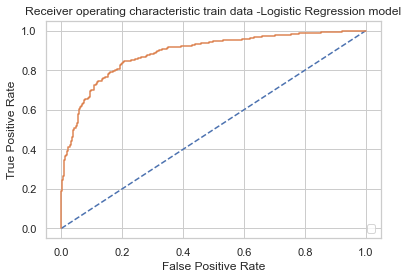

In [121]:
# predict probabilities
probs = Logistic_Model.predict_proba(X_train_LR)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Logist_train_auc = roc_auc_score(y_train_LR, probs)
print('AUC: %.3f' % Logist_train_auc)
# calculate roc curve
Logist_train_fpr,Logist_train_tpr,Logist_train_thresholds = roc_curve(y_train_LR, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Logist_train_fpr, Logist_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Logistic Regression model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

No handles with labels found to put in legend.


AUC: 0.891


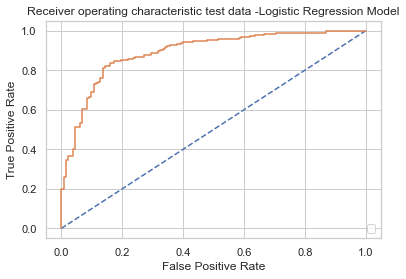

In [122]:
# predict probabilities
probs = Logistic_Model.predict_proba(X_test_LR)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Logist_test_auc = roc_auc_score(y_test_LR, probs)
print('AUC: %.3f' % Logist_test_auc)
# calculate roc curve
Logist_test_fpr, Logist_test_tpr, Logist_testthresholds = roc_curve(y_test_LR, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Logist_test_fpr, Logist_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -Logistic Regression Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [123]:
y_train_predict = Logistic_Model.predict(X_train_LR)
y_test_predict = Logistic_Model.predict(X_test_LR)

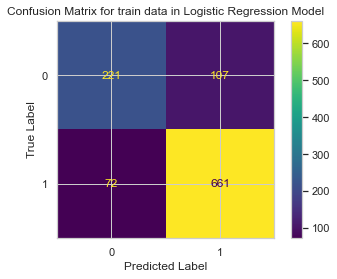

In [124]:
plot_confusion_matrix(Logistic_Model,X_train_LR,y_train_LR)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for train data in Logistic Regression Model')
plt.show()

In [126]:
X_train_LR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 1373 to 686
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1061 non-null   int64  
 1   economic.cond.national   1061 non-null   float64
 2   economic.cond.household  1061 non-null   float64
 3   Blair                    1061 non-null   int64  
 4   Hague                    1061 non-null   int64  
 5   Europe                   1061 non-null   int64  
 6   political.knowledge      1061 non-null   float64
 7   gender                   1061 non-null   int8   
dtypes: float64(3), int64(4), int8(1)
memory usage: 67.3 KB


<AxesSubplot:title={'center':'Feature Importance'}>

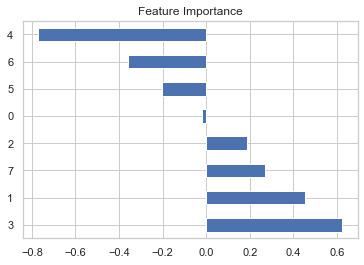

In [127]:
importance = Logistic_Model.coef_[0] 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

Feature: 0, Score: -0.01672
Feature: 1, Score: 0.45474
Feature: 2, Score: 0.18846
Feature: 3, Score: 0.62554
Feature: 4, Score: -0.77163
Feature: 5, Score: -0.20070
Feature: 6, Score: -0.35889
Feature: 7, Score: 0.27203


<AxesSubplot:title={'center':'Feature Importance'}>

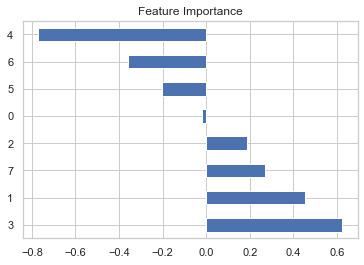

In [128]:
importance =Logistic_Model.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

feature_importance=pd.DataFrame({'feature':list(X_train_LR.columns),'feature_importance':[abs(i) for i in Logistic_Model.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)
importance = Logistic_Model.coef_[0]

feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

In [129]:
print(classification_report(y_train_LR,y_train_predict))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       328
           1       0.86      0.90      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [130]:
confusion_matrix(y_train_LR, y_train_predict_LR)

array([[221, 107],
       [ 72, 661]], dtype=int64)

In [131]:
Logist_metrics=classification_report(y_train_LR, y_train_predict,output_dict=True)
df=pd.DataFrame(Logist_metrics).transpose()
Logist_train_precision=round(df.loc["1"][0],2)
Logist_train_recall=round(df.loc["1"][1],2)
Logist_train_f1=round(df.loc["1"][2],2)
print ('Logist_train_precision ',Logist_train_precision)
print ('Logist_train_recall ',Logist_train_recall)
print ('Logist_train_f1 ',Logist_train_f1)

Logist_train_precision  0.86
Logist_train_recall  0.9
Logist_train_f1  0.88


In [132]:
y_train_predict_LR = Logistic_Model.predict(X_train_LR)
y_test_predict_LR = Logistic_Model.predict(X_test_LR)

In [133]:
confusion_matrix(y_test_LR, y_test_predict_LR)

array([[ 87,  45],
       [ 29, 295]], dtype=int64)

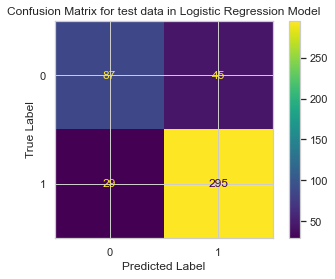

In [134]:
plot_confusion_matrix(Logistic_Model,X_test_LR, y_test_LR)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for test data in Logistic Regression Model')
plt.show()

In [135]:
print(classification_report(y_test_LR, y_test_predict))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       132
           1       0.87      0.91      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.78      0.80       456
weighted avg       0.83      0.84      0.83       456



In [136]:
Logist_metrics=classification_report(y_test_LR, y_test_predict,output_dict=True)
df=pd.DataFrame(Logist_metrics).transpose()
Logist_test_precision=round(df.loc["1"][0],2)
Logist_test_recall=round(df.loc["1"][1],2)
Logist_test_f1=round(df.loc["1"][2],2)
print ('Logist_test_precision ',Logist_test_precision)
print ('Logist_test_recall ',Logist_test_recall)
print ('Logist_test_f1 ',Logist_test_f1)

Logist_test_precision  0.87
Logist_test_recall  0.91
Logist_test_f1  0.89


In [137]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [138]:
X_train_LDA,X_test_LDA,y_train_LDA,y_test_LDA=train_test_split(X,y,test_size=.30,random_state=1)

In [139]:
LDA_Model = LinearDiscriminantAnalysis()

In [140]:
LDA_Model.fit(X_train_LDA,y_train_LDA)

LinearDiscriminantAnalysis()

In [141]:
posterior = LDA_Model.decision_function(X_train_LDA)
print(posterior)
print(np.exp(posterior))

[-2.95006026  2.47595104  0.82319121 ...  1.2650685   1.32134149
  3.96041141]
[5.23365519e-02 1.18930125e+01 2.27775706e+00 ... 3.54333545e+00
 3.74844651e+00 5.24789119e+01]


In [142]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_LDA= LDA_Model.predict(X_train_LDA)
print(pred_class_train_LDA)

[0 1 1 ... 1 1 1]


In [143]:
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_LDA = LDA_Model.predict(X_test_LDA)

print(pred_class_test_LDA)

[1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1
 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1
 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1
 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1
 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1
 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 0 1 1 1 0 1 1 1]


In [144]:
ytest_predict_prob_LDA=LDA_Model.predict_proba(X_test_LDA)
pd.DataFrame(ytest_predict_prob_LDA).head()

,0,1
0,0.465970,0.534030
1,0.137501,0.862499
2,0.005997,0.994003
3,0.866101,0.133899
4,0.053663,0.946337


In [145]:
ytrain_predict_prob_LDA=LDA_Model.predict_proba(X_train_LDA)
pd.DataFrame(ytrain_predict_prob_LDA).head()

,0,1
0,0.950266,0.049734
1,0.077561,0.922439
2,0.305087,0.694913
3,0.080344,0.919656
4,0.011710,0.988290


In [146]:
# Training Data Probability Prediction in LDA MOdel
# ?model.predict_proba

#y_pred = (clf.predict_proba(X_test)[:,1] >= 0.3).astype(bool) # set threshold as 0.3
pred_prob_train_LDA = LDA_Model.predict_proba(X_train_LDA)

# Test Data Probability Prediction in LDA MOdel 
pred_prob_test_LDA = LDA_Model.predict_proba(X_test_LDA)

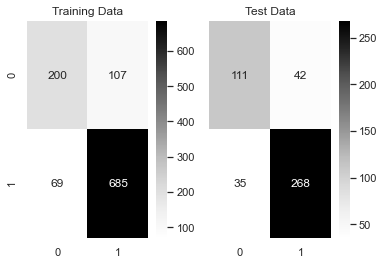

In [147]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)


plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_LDA,pred_class_train_LDA)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test_LDA,pred_class_test_LDA)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [148]:
LDA_train_acc=LDA_Model.score(X_train_LDA,y_train_LDA)
LDA_train_acc

0.8341187558906692

In [149]:
LDA_test_acc=LDA_Model.score(X_test_LDA,y_test_LDA)
LDA_test_acc

0.831140350877193

In [150]:
LDA_metrics=classification_report(y_train_LDA,pred_class_train_LDA,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_precision=round(df.loc["1"][0],2)
LDA_train_recall=round(df.loc["1"][1],2)
LDA_train_f1=round(df.loc["1"][2],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.86
LDA_train_recall  0.91
LDA_train_f1  0.89


In [151]:
LDA_metrics=classification_report(y_test_LDA,pred_class_test_LDA,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(df.loc["1"][0],2)
LDA_test_recall=round(df.loc["1"][1],2)
LDA_test_f1=round(df.loc["1"][2],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_precision  0.86
LDA_test_recall  0.88
LDA_test_f1  0.87


In [153]:
print('Classification Report of the training data-LDA Model:\n\n',metrics.classification_report(y_train_LDA,pred_class_train_LDA),'\n')
print('Classification Report of the test data-LDA Model:\n\n',metrics.classification_report(y_test_LDA,pred_class_test_LDA),'\n')

Classification Report of the training data-LDA Model:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data-LDA Model:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [154]:
# Training Data Probability Prediction in LDA Model
# ?model.predict_proba

#y_pred = (clf.predict_proba(X_test)[:,1] >= 0.3).astype(bool) # set threshold as 0.3
pred_prob_train_LDA = LDA_Model.predict_proba(X_train_LDA)

# Test Data Probability Prediction in LDA Model
pred_prob_test_LDA = LDA_Model.predict_proba(X_test_LDA)

No handles with labels found to put in legend.


AUC: 0.888


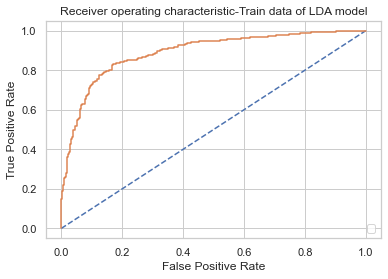

No handles with labels found to put in legend.


AUC: 0.890


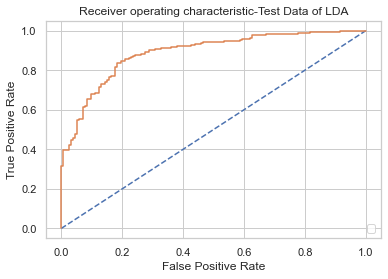

In [155]:
# AUC and ROC for the training data in LDA MOdel
# predict probabilities
probs = LDA_Model.predict_proba(X_train_LDA)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_train_auc = roc_auc_score(y_train_LDA, probs)
print('AUC: %.3f' % Logist_train_auc)
# calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = roc_curve(y_train_LDA, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic-Train data of LDA model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
# AUC and ROC for the test data in LDA Model

# predict probabilities
probs = LDA_Model.predict_proba(X_test_LDA)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(y_test_LDA, probs)
print('AUC: %.3f' % LDA_train_auc)
# calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_test_thresholds = roc_curve(y_test_LDA, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic-Test Data of LDA')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [156]:
X_train_LDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 991 to 1065
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1061 non-null   int64  
 1   economic.cond.national   1061 non-null   float64
 2   economic.cond.household  1061 non-null   float64
 3   Blair                    1061 non-null   int64  
 4   Hague                    1061 non-null   int64  
 5   Europe                   1061 non-null   int64  
 6   political.knowledge      1061 non-null   float64
 7   gender                   1061 non-null   int8   
dtypes: float64(3), int64(4), int8(1)
memory usage: 67.3 KB


Feature: 0, Score: -0.02018
Feature: 1, Score: 0.63314
Feature: 2, Score: 0.06685
Feature: 3, Score: 0.74136
Feature: 4, Score: -0.92726
Feature: 5, Score: -0.22367
Feature: 6, Score: -0.42879
Feature: 7, Score: 0.14765


<AxesSubplot:title={'center':'Feature Importance'}>

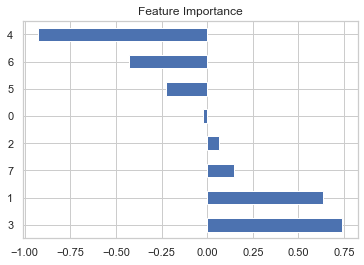

In [157]:
# get importance
importance =LDA_Model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# importance = Logistic_Model.coef_[0]
feature_importance=pd.DataFrame({'feature':list(X_train_LDA.columns),'feature_importance':[abs(i) for i in LDA_Model.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)
importance = LDA_Model.coef_[0]
#importance is a list so you can plot it. 

feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [159]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03
mean,1.917458e-17,-5.848980e-16,-2.304609e-16,-1.034842e-16,5.386448e-17,6.293947e-17,-7.665442e-16,2.648581e-16
std,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00
min,-1.926617e+00,-2.059394e+00,-1.872709e+00,-1.988727e+00,-1.419969e+00,-1.740556e+00,-1.421084e+00,-9.367365e-01
25%,-8.435773e-01,-3.016479e-01,-1.796818e-01,-1.137217e+00,-6.083289e-01,-8.309016e-01,-1.421084e+00,-9.367365e-01
50%,-7.907881e-02,-3.016479e-01,-1.796818e-01,5.658022e-01,-6.083289e-01,-2.244654e-01,4.238322e-01,-9.367365e-01
75%,8.128361e-01,8.701828e-01,9.490028e-01,5.658022e-01,1.014951e+00,9.884072e-01,4.238322e-01,1.067536e+00
max,2.469250e+00,2.042014e+00,2.077687e+00,1.417312e+00,1.826592e+00,1.291625e+00,1.346290e+00,1.067536e+00


In [160]:
XScaled.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [161]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(XScaled, y, test_size=0.30, random_state=0)

In [162]:
KNN_model=KNeighborsClassifier(n_neighbors= 5,weights='uniform',algorithm='auto',n_jobs=None )

In [163]:
KNN_model.fit(X_train_KNN, y_train_KNN)

KNeighborsClassifier()

In [164]:
predicted_labels = KNN_model.predict(X_test_KNN)
KNN_model.score(X_test_KNN, y_test_KNN)

0.8223684210526315

In [165]:
y_train_predict_KNN = KNN_model.predict(X_train_KNN)
KNN_model_score_train = KNN_model.score(X_train_KNN, y_train_KNN)
print(KNN_model_score_train)
print(metrics.confusion_matrix(y_train_KNN, y_train_predict_KNN))
print(metrics.classification_report(y_train_KNN, y_train_predict_KNN))

0.8708765315739868
[[252  76]
 [ 61 672]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       328
           1       0.90      0.92      0.91       733

    accuracy                           0.87      1061
   macro avg       0.85      0.84      0.85      1061
weighted avg       0.87      0.87      0.87      1061



In [166]:
y_test_predict_KNN = KNN_model.predict(X_test_KNN)
KNN_model_score_test = KNN_model.score(X_test_KNN, y_test_KNN)
print(KNN_model_score_test)
print(metrics.confusion_matrix(y_test_KNN, y_test_predict_KNN))
print(metrics.classification_report(y_test_KNN, y_test_predict_KNN))
0.8223684210526315

0.8223684210526315
[[ 91  41]
 [ 40 284]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       132
           1       0.87      0.88      0.88       324

    accuracy                           0.82       456
   macro avg       0.78      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456



0.8223684210526315

No handles with labels found to put in legend.


AUC: 0.935


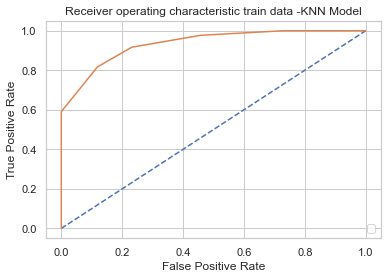

In [167]:
probs = KNN_model.predict_proba(X_train_KNN)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_train_auc = roc_auc_score(y_train_KNN, probs)
print('AUC: %.3f' % KNN_train_auc)
# calculate roc curve
KNN_train_fpr, KNN_train_tpr, KNN_trainthresholds = roc_curve(y_train_KNN, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -KNN Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

No handles with labels found to put in legend.


AUC: 0.845


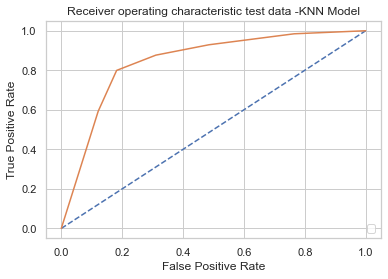

In [168]:
# predict probabilities
probs = KNN_model.predict_proba(X_test_KNN)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(y_test_KNN, probs)
print('AUC: %.3f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr, KNN_test_tpr, KNN_testthresholds = roc_curve(y_test_KNN, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -KNN Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [169]:
KNN_metrics=classification_report(y_train_KNN,y_train_predict_KNN,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_train_precision=round(df.loc["1"][0],2)
KNN_train_recall=round(df.loc["1"][1],2)
KNN_train_f1=round(df.loc["1"][2],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_precision  0.9
KNN_train_recall  0.92
KNN_train_f1  0.91


In [170]:
KNN_metrics=classification_report(y_test_KNN,y_test_predict_KNN,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_test_precision=round(df.loc["1"][0],2)
KNN_test_recall=round(df.loc["1"][1],2)
KNN_test_f1=round(df.loc["1"][2],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_precision  0.87
KNN_test_recall  0.88
KNN_test_f1  0.88


In [171]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_KNN, y_train_KNN)
    # evaluate test accuracy
    scores = knn.score(X_test_KNN, y_test_KNN)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.22587719298245612,
 0.19517543859649122,
 0.17763157894736847,
 0.17763157894736847,
 0.1842105263157895,
 0.17543859649122806,
 0.17982456140350878,
 0.17982456140350878,
 0.16885964912280704,
 0.1578947368421053]

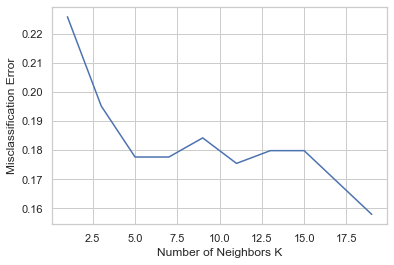

In [172]:
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [173]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN_model, X_train_KNN, y_train_KNN, cv=10)
scores

array([0.73831776, 0.85849057, 0.82075472, 0.73584906, 0.78301887,
       0.87735849, 0.79245283, 0.76415094, 0.81132075, 0.81132075])

In [174]:
scores = cross_val_score(KNN_model, X_test_KNN, y_test_KNN, cv=10)
scores

array([0.7826087 , 0.84782609, 0.82608696, 0.7173913 , 0.82608696,
       0.82608696, 0.82222222, 0.88888889, 0.84444444, 0.88888889])

In [175]:
param_grid = {'n_neighbors':[5,6,7,8,9,10],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','brute','kd_tree'],'p':[2]}
KNN_model = KNeighborsClassifier()
                              
KNN_model.fit(X_train_KNN,y_train_KNN)

KNeighborsClassifier()

In [176]:
grid_search = GridSearchCV(estimator = KNN_model, param_grid = param_grid)

In [177]:
grid_search.fit(X_train_KNN,y_train_KNN)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'brute', 'kd_tree'],
                         'n_neighbors': [5, 6, 7, 8, 9, 10], 'p': [2],
                         'weights': ['uniform', 'distance']})

In [178]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}

In [179]:
best_grid = grid_search.best_estimator_

In [180]:
best_grid

KNeighborsClassifier(n_neighbors=9)

In [181]:
ytrain_predict = best_grid.predict(X_train_KNN)
ytest_predict = best_grid.predict(X_test_KNN)

In [182]:
confusion_matrix(y_train_KNN,ytrain_predict)

array([[236,  92],
       [ 70, 663]], dtype=int64)

In [183]:
KNNg_train_acc=best_grid.score(X_train_KNN,y_train_KNN) 
KNNg_train_acc

0.8473138548539114

In [184]:
print(classification_report(y_train_KNN,ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       328
           1       0.88      0.90      0.89       733

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



Area under Curve is 0.9207421056134163


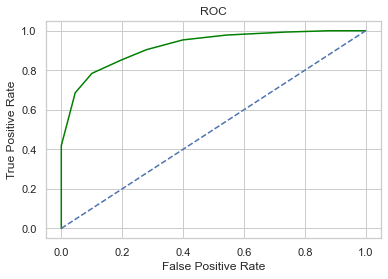

In [185]:
KNNg_train_fpr, KNNg_train_tpr,_=roc_curve(y_train_KNN,best_grid.predict_proba(X_train_KNN)[:,1])
plt.plot(KNNg_train_fpr,KNNg_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNNg_train_auc=roc_auc_score(y_train_KNN,best_grid.predict_proba(X_train_KNN)[:,1])
print('Area under Curve is', KNNg_train_auc)

In [186]:
confusion_matrix(y_test_KNN,ytest_predict)

array([[ 89,  43],
       [ 41, 283]], dtype=int64)

In [187]:
KNNg_test_acc=best_grid.score(X_test_KNN,y_test_KNN)
KNNg_test_acc

0.8157894736842105

In [188]:
print(classification_report(y_test_KNN,ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68       132
           1       0.87      0.87      0.87       324

    accuracy                           0.82       456
   macro avg       0.78      0.77      0.78       456
weighted avg       0.81      0.82      0.82       456



Area under Curve is 0.9207421056134163


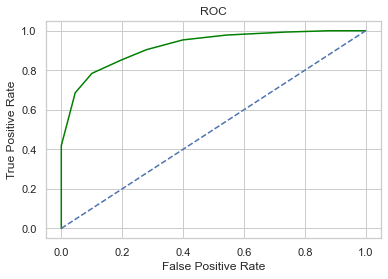

In [189]:
KNNg_train_fpr, KNNg_train_tpr,_=roc_curve(y_train_KNN,best_grid.predict_proba(X_train_KNN)[:,1])
plt.plot(KNNg_train_fpr,KNNg_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNNg_train_auc=roc_auc_score(y_train_KNN,best_grid.predict_proba(X_train_KNN)[:,1])
print('Area under Curve is', KNNg_train_auc)

In [190]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03
mean,1.917458e-17,-5.848980e-16,-2.304609e-16,-1.034842e-16,5.386448e-17,6.293947e-17,-7.665442e-16,2.648581e-16
std,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00
min,-1.926617e+00,-2.059394e+00,-1.872709e+00,-1.988727e+00,-1.419969e+00,-1.740556e+00,-1.421084e+00,-9.367365e-01
25%,-8.435773e-01,-3.016479e-01,-1.796818e-01,-1.137217e+00,-6.083289e-01,-8.309016e-01,-1.421084e+00,-9.367365e-01
50%,-7.907881e-02,-3.016479e-01,-1.796818e-01,5.658022e-01,-6.083289e-01,-2.244654e-01,4.238322e-01,-9.367365e-01
75%,8.128361e-01,8.701828e-01,9.490028e-01,5.658022e-01,1.014951e+00,9.884072e-01,4.238322e-01,1.067536e+00
max,2.469250e+00,2.042014e+00,2.077687e+00,1.417312e+00,1.826592e+00,1.291625e+00,1.346290e+00,1.067536e+00


In [192]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(XScaled, y, test_size=0.30, random_state=0)

In [193]:
NB_model = GaussianNB()

In [194]:
NB_model.fit(X_train_NB,y_train_NB)

GaussianNB()

In [195]:
y_train_predict_NB = NB_model.predict(X_train_NB)
model_score_NB_Train = NB_model.score(X_train_NB, y_train_NB)                      ## Accuracy
print(model_score_NB_Train)
print(metrics.confusion_matrix(y_train_NB, y_train_predict_NB))          ## confusion_matrix
print(metrics.classification_report(y_train_NB, y_train_predict_NB)) 

0.824693685202639
[[230  98]
 [ 88 645]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       328
           1       0.87      0.88      0.87       733

    accuracy                           0.82      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



No handles with labels found to put in legend.


AUC: 0.884


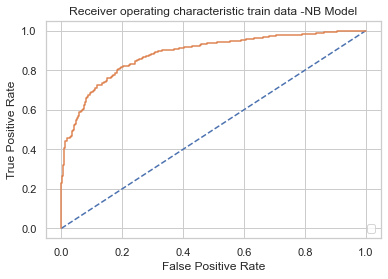

In [196]:
probs = NB_model.predict_proba(X_train_NB)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_train_auc = roc_auc_score(y_train_NB, probs)
print('AUC: %.3f' % NB_train_auc)
# calculate roc curve
NB_train_fpr, NB_train_tpr, NB_trainthresholds = roc_curve(y_train_NB, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -NB Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

0.8442982456140351
[[ 95  37]
 [ 34 290]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       132
           1       0.89      0.90      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



In [198]:
NB_metrics=classification_report(y_train_NB,y_train_predict_NB,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_train_precision=round(df.loc["1"][2],2)
NB_train_recall=round(df.loc["1"][1],2)
NB_train_f1=round(df.loc["1"][2],2)
print ('NB_train_precision',NB_train_precision)
print ('NB_train_recall',NB_train_recall)
print ('NB_train_f1',NB_train_f1)

NB_train_precision 0.87
NB_train_recall 0.88
NB_train_f1 0.87


In [199]:
NB_metrics=classification_report(y_test_NB,y_test_predict_NB,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_test_precision=round(df.loc["1"][0],2)
NB_test_recall=round(df.loc["1"][1],2)
NB_test_f1=round(df.loc["1"][2],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_test_precision  0.89
NB_test_recall  0.9
NB_test_f1  0.89


No handles with labels found to put in legend.


AUC: 0.888


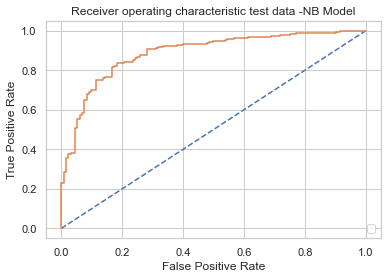

In [200]:
probs = NB_model.predict_proba(X_test_NB)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_test_auc = roc_auc_score(y_test_NB, probs)
print('AUC: %.3f' % NB_test_auc)
# calculate roc curve
NB_test_fpr, NB_test_tpr, NB_testthresholds = roc_curve(y_test_NB, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -NB Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [201]:
print('Classification Report of the training data in NB_model:\n\n',metrics.classification_report(y_train_NB,y_train_predict_NB),'\n')
print('Classification Report of the test data in NB_model:\n\n',metrics.classification_report(y_test_NB,y_test_predict_NB),'\n')

Classification Report of the training data in NB_model:

               precision    recall  f1-score   support

           0       0.72      0.70      0.71       328
           1       0.87      0.88      0.87       733

    accuracy                           0.82      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 

Classification Report of the test data in NB_model:

               precision    recall  f1-score   support

           0       0.74      0.72      0.73       132
           1       0.89      0.90      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456
 



In [202]:
NB_model.score(X_train_NB, y_train_NB)

0.824693685202639

In [203]:
NB_model.score(X_test_NB, y_test_NB)

0.8442982456140351

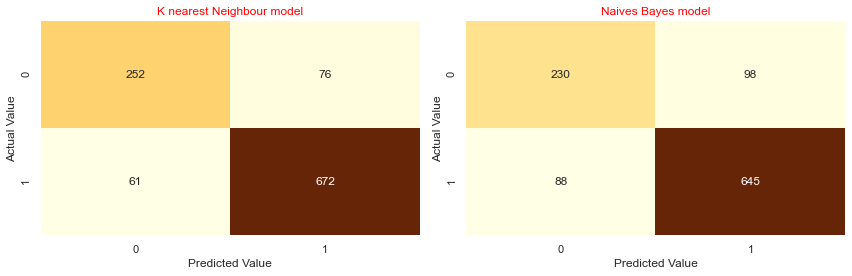

In [205]:
# Comparing the confusion matrices from GaussiansNB model and KNN models for train set 
models=[KNN_model,NB_model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={KNN_model:'K nearest Neighbour model',NB_model:'Naives Bayes model'}
fig=plt.figure(figsize=(12,4))
for i in range(0,len(models)):
    ax=fig.add_subplot(1,2,i+1)
    if models[i]==KNN_model:
        sns.heatmap(confusion_matrix(y_train_KNN,models[i].predict(X_train_KNN)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    else:
        sns.heatmap(confusion_matrix(y_train_NB,models[i].predict(X_train_NB)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
        
plt.tight_layout()

#    plot_confusion_matrix(modelLR,X_train,y_train)     

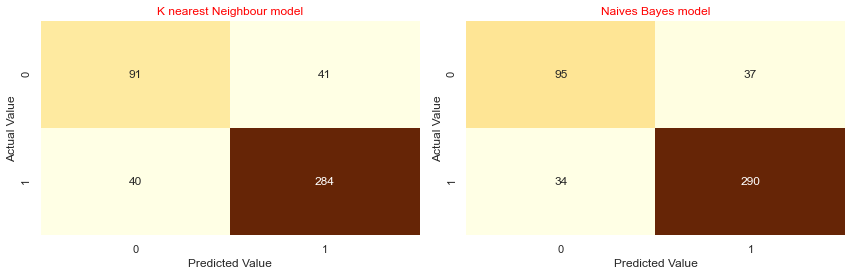

In [206]:
models=[KNN_model,NB_model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={KNN_model:'K nearest Neighbour model',NB_model:'Naives Bayes model'}
fig=plt.figure(figsize=(12,4))
for i in range(0,len(models)):
    ax=fig.add_subplot(1,2,i+1)
    if models[i]==KNN_model:
        sns.heatmap(confusion_matrix(y_test_KNN,models[i].predict(X_test_KNN)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    else:
        sns.heatmap(confusion_matrix(y_test_NB,models[i].predict(X_test_NB)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
        
plt.tight_layout()


Area under the curve for KNN model is 0.935
Area under the curve for NB model is 0.884


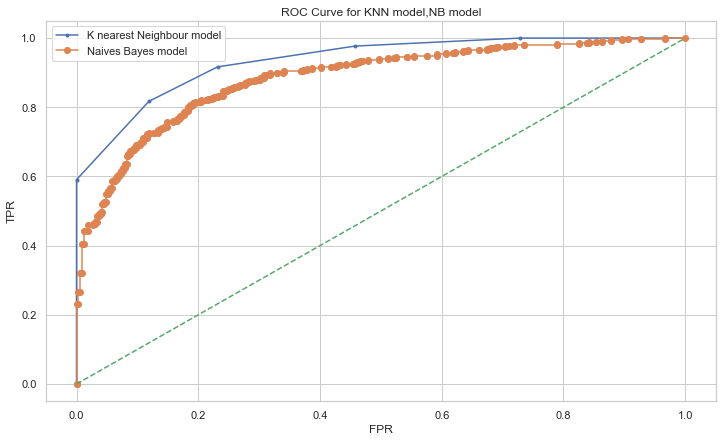

In [207]:
# Comparing area under curve for GaussiansNB and KNN models for train set:
models=[KNN_model,NB_model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={KNN_model:'K nearest Neighbour model',NB_model:'Naives Bayes model'}
print('Area under the curve for KNN model is',
      round(roc_auc_score(y_train_KNN,KNN_model.predict_proba(X_train_KNN)[:,1]),3))
print('Area under the curve for NB model is',
      round(roc_auc_score(y_train_NB,NB_model.predict_proba(X_train_NB)[:,1]),3))


plt.figure(figsize=(12,7))
fpr_dtc,tpr_dtc,thresholds=roc_curve(y_train_KNN,KNN_model.predict_proba(X_train_KNN)[:,1])
plt.plot(fpr_dtc,tpr_dtc,marker='.')
fpr_rfc,tpr_rfc,thresholds=roc_curve(y_train_NB,NB_model.predict_proba(X_train_NB)[:,1])
plt.plot(fpr_rfc,tpr_rfc,marker='o')
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve for {}'.format('KNN model,NB model'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

Area under the curve for KNN model is 0.845
Area under the curve for NB model is 0.888


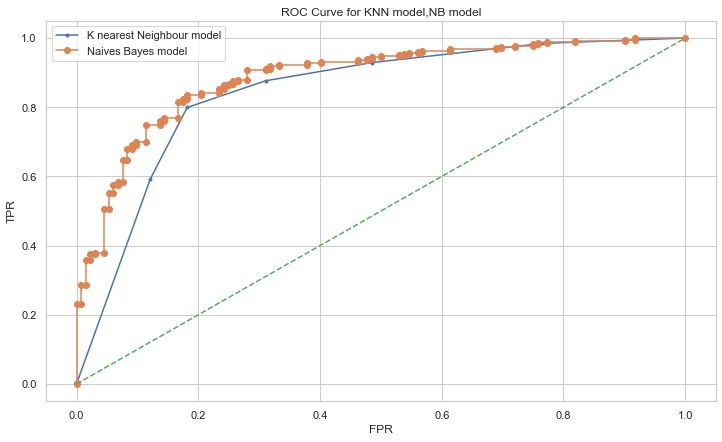

In [208]:
# Comparing area under curve for Gaussians and KNN models for test set:
models=[KNN_model,NB_model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={KNN_model:'K nearest Neighbour model',NB_model:'Naives Bayes model'}
print('Area under the curve for KNN model is',
      round(roc_auc_score(y_test_KNN,KNN_model.predict_proba(X_test_KNN)[:,1]),3))
print('Area under the curve for NB model is',
      round(roc_auc_score(y_test_NB,NB_model.predict_proba(X_test_NB)[:,1]),3))


plt.figure(figsize=(12,7))
fpr_dtc,tpr_dtc,thresholds=roc_curve(y_test_KNN,KNN_model.predict_proba(X_test_KNN)[:,1])
plt.plot(fpr_dtc,tpr_dtc,marker='.')
fpr_rfc,tpr_rfc,thresholds=roc_curve(y_test_NB,NB_model.predict_proba(X_test_NB)[:,1])
plt.plot(fpr_rfc,tpr_rfc,marker='o')
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve for {}'.format('KNN model,NB model'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

In [209]:
index=['Accuracy','AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'KNN train':[KNN_model_score_train,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'KNN Test':[KNN_model_score_test,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
       'NB Train':[model_score_NB_Train,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
        'NB Test':[model_score_NB_Test,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1]},index=index)
round(data,2)

,KNN train,KNN Test,NB Train,NB Test
Accuracy,0.87,0.82,0.82,0.84
AUC,0.93,0.84,0.88,0.89
Recall,0.92,0.88,0.88,0.90
Precision,0.90,0.87,0.87,0.89
F1 Score,0.91,0.88,0.87,0.89


In [210]:
from sklearn.ensemble import RandomForestClassifier

In [211]:
X_train_RF,X_test_RF,y_train_RF,y_test_RF=train_test_split(X,y,test_size=.30,random_state=0)

In [212]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train_RF,y_train_RF)

RandomForestClassifier(random_state=1)

In [214]:
y_train_predict_RF= RF_model.predict(X_train_RF)
RF_model_score= RF_model.score(X_train_RF,y_train_RF)
print(RF_model_score)
print(metrics.confusion_matrix(y_train_RF, y_train_predict_RF))
print(metrics.classification_report(y_train_RF, y_train_predict_RF))

1.0
[[328   0]
 [  0 733]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       733

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [215]:
y_test_predict_RF= RF_model.predict(X_test_RF)
RF_model_score= RF_model.score(X_test_RF,y_test_RF)
print(RF_model_score)
print(metrics.confusion_matrix(y_test_RF, y_test_predict_RF))
print(metrics.classification_report(y_test_RF, y_test_predict_RF))

0.831140350877193
[[ 91  41]
 [ 36 288]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.70       132
           1       0.88      0.89      0.88       324

    accuracy                           0.83       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.83      0.83      0.83       456



In [216]:
param_grid = {'max_depth': [5,6,7],
    'max_features': [8,9,10],
    'min_samples_leaf': [20,25,30],
    'min_samples_split': [50,60,70],
    'n_estimators': [50,100,150]
}
    

rfcl = RandomForestClassifier(random_state=1)
# Applying Grid Search
# grid_search_rf = GridSearchCV(estimator = model_rf, param_grid = grid_rf,n_jobs=-1, cv = 3,scoring='f1')
grid_search_RF=GridSearchCV(estimator = rfcl, param_grid = param_grid,cv = 5)

In [217]:
grid_search_RF.fit(X_train_RF,y_train_RF)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [8, 9, 10],
                         'min_samples_leaf': [20, 25, 30],
                         'min_samples_split': [50, 60, 70],
                         'n_estimators': [50, 100, 150]})

In [218]:
grid_search_RF.best_params_

{'max_depth': 5,
 'max_features': 8,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 100}

In [219]:
best_grid_RF = grid_search_RF.best_estimator_

In [220]:
best_grid_RF

RandomForestClassifier(max_depth=5, max_features=8, min_samples_leaf=20,
                       min_samples_split=60, random_state=1)

In [221]:
model_RF=RandomForestClassifier(max_depth=5, max_features=8, min_samples_leaf=20,
                       min_samples_split=50, n_estimators=200)

In [222]:
ytrain_predict_RF = best_grid_RF.predict(X_train_RF)
ytest_predict_RF = best_grid_RF.predict(X_test_RF)

In [223]:
confusion_matrix(y_train_RF,ytrain_predict_RF)

array([[240,  88],
       [ 84, 649]], dtype=int64)

In [224]:
confusion_matrix(y_test_RF,ytest_predict_RF)

array([[ 96,  36],
       [ 32, 292]], dtype=int64)

In [225]:
RF_train_acc=best_grid_RF.score(X_train_RF,y_train_RF) 
RF_train_acc

0.8378887841658812

In [226]:
RF_test_acc=best_grid_RF.score(X_test_RF,y_test_RF) 
RF_test_acc

0.8508771929824561

In [227]:
print(classification_report(y_train_RF,ytrain_predict_RF))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       328
           1       0.88      0.89      0.88       733

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [228]:
print(classification_report(y_test_RF,ytest_predict_RF))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       132
           1       0.89      0.90      0.90       324

    accuracy                           0.85       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



In [229]:
RF_metrics=classification_report(y_train_RF,ytrain_predict_RF,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()
train_RF_precision=round(df.loc["1"][0],2)
train_RF_recall=round(df.loc["1"][1],2)
train_RF_f1=round(df.loc["1"][2],2)
print ('train_RF_precision ',train_RF_precision)
print ('train_RF_recall ',train_RF_recall)
print ('train_RF_f1 ',train_RF_f1)

train_RF_precision  0.88
train_RF_recall  0.89
train_RF_f1  0.88


In [230]:
RF_metrics=classification_report(y_test_RF,ytest_predict_RF,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()
test_RF_precision=round(df.loc["1"][0],2)
test_RF_recall=round(df.loc["1"][1],2)
test_RF_f1=round(df.loc["1"][2],2)
print ('test_RF_precision ',test_RF_precision)
print ('test_RF_recall ',test_RF_recall)
print ('test_RF_f1 ',test_RF_f1)

test_RF_precision  0.89
test_RF_recall  0.9
test_RF_f1  0.9


Area under Curve is 0.9066877682760457


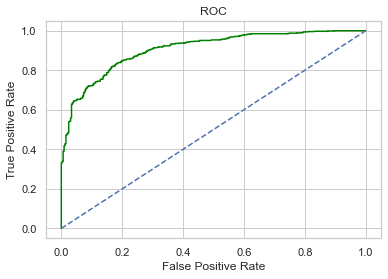

In [231]:
train_RF_fpr, train_RF_tpr,_=roc_curve(y_train_RF,best_grid_RF.predict_proba(X_train_RF)[:,1])
plt.plot(train_RF_fpr,train_RF_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
train_RF_auc=roc_auc_score(y_train_RF,best_grid_RF.predict_proba(X_train_RF)[:,1])
print('Area under Curve is', train_RF_auc)

Area under Curve is 0.8872170781893004


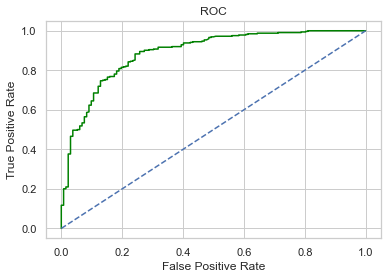

In [232]:
test_RF_fpr, test_RF_tpr,_=roc_curve(y_test_RF,best_grid_RF.predict_proba(X_test_RF)[:,1])
plt.plot(test_RF_fpr,test_RF_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
test_RF_auc=roc_auc_score(y_test_RF,best_grid_RF.predict_proba(X_test_RF)[:,1])
print('Area under Curve is', test_RF_auc)

In [233]:
print (pd.DataFrame(best_grid_RF.feature_importances_, columns = ["Imp"], index = X_train_RF.columns).sort_values('Imp',ascending=False))

                              Imp
Hague                    0.400414
Blair                    0.238268
Europe                   0.184487
political.knowledge      0.083455
age                      0.056366
economic.cond.national   0.025779
economic.cond.household  0.009352
gender                   0.001878


In [234]:
 from sklearn.ensemble import BaggingClassifier

In [235]:
X_train_bag,X_test_bag,y_train_bag,y_test_bag=train_test_split(X,y,test_size=.30,random_state=0)

In [236]:
bgcl = BaggingClassifier()

bgcl = bgcl.fit(X_train_bag, y_train_bag)

0.9820923656927427


<AxesSubplot:>

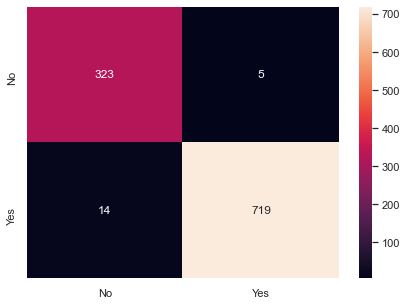

In [237]:
y_predict_train = bgcl.predict(X_train_bag)

print(bgcl.score(X_train_bag , y_train_bag))

cm=metrics.confusion_matrix(y_train_bag, y_predict_train,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.8157894736842105


<AxesSubplot:>

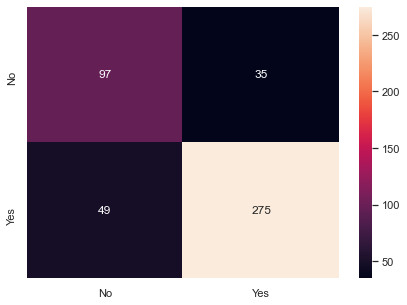

In [238]:
y_predict_test = bgcl.predict(X_test_bag)

print(bgcl.score(X_test_bag , y_test_bag))

cm=metrics.confusion_matrix(y_test_bag, y_predict_test,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [239]:
print(classification_report(y_train_bag,y_predict_train))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       328
           1       0.99      0.98      0.99       733

    accuracy                           0.98      1061
   macro avg       0.98      0.98      0.98      1061
weighted avg       0.98      0.98      0.98      1061



In [240]:
print(classification_report(y_test_bag,y_predict_test))

              precision    recall  f1-score   support

           0       0.66      0.73      0.70       132
           1       0.89      0.85      0.87       324

    accuracy                           0.82       456
   macro avg       0.78      0.79      0.78       456
weighted avg       0.82      0.82      0.82       456



Area under Curve Bagging Classifier is 0.9981761388214154


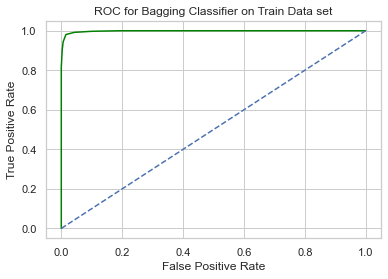

In [241]:
train_bag_fpr, train_bag_tpr,_=roc_curve(y_train_bag,bgcl.predict_proba(X_train_bag)[:,1])
plt.plot(train_bag_fpr,train_bag_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Bagging Classifier on Train Data set')
train_bag_auc=roc_auc_score(y_train_bag,bgcl.predict_proba(X_train_bag)[:,1])
print('Area under Curve Bagging Classifier is', train_bag_auc)

Area under Curve -Bagging Classifier is 0.8671553497942388


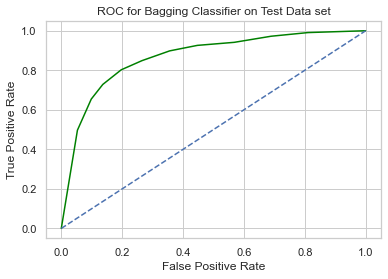

In [242]:
test_bag_fpr, test_bag_tpr,_=roc_curve(y_test_bag,bgcl.predict_proba(X_test_bag)[:,1])
plt.plot(test_bag_fpr,test_bag_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Bagging Classifier on Test Data set')
test_bag_auc=roc_auc_score(y_test_RF,bgcl.predict_proba(X_test_bag)[:,1])
print('Area under Curve -Bagging Classifier is', test_bag_auc)

In [243]:
X_train_gbcl,X_test_gbcl,y_train_gbcl,y_test_gbcl=train_test_split(X,y,test_size=.30,random_state=0)

In [244]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 500,random_state=100)
gbcl = gbcl.fit(X_train_gbcl, y_train_gbcl)

0.9566446748350612


<AxesSubplot:>

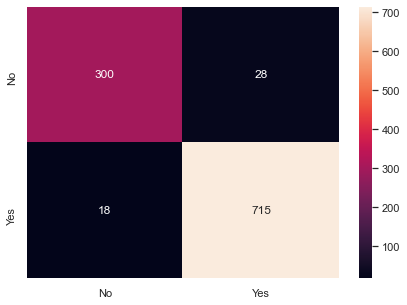

In [245]:
y_predict = gbcl.predict(X_train_gbcl)
print(gbcl.score(X_train_gbcl, y_train_gbcl))
cm=metrics.confusion_matrix(y_train_gbcl, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.8245614035087719


<AxesSubplot:>

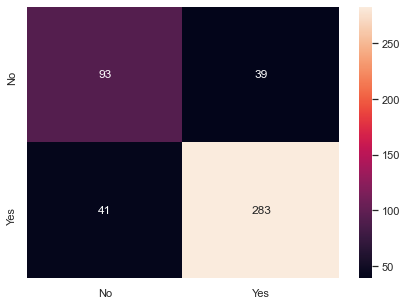

In [246]:
y_predict = gbcl.predict(X_test_gbcl)
print(gbcl.score(X_test_gbcl, y_test_gbcl))
cm=metrics.confusion_matrix(y_test_gbcl, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [247]:
print(classification_report(y_train_gbcl,y_predict_train))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       328
           1       0.99      0.98      0.99       733

    accuracy                           0.98      1061
   macro avg       0.98      0.98      0.98      1061
weighted avg       0.98      0.98      0.98      1061



In [248]:
print(classification_report(y_test_gbcl,y_predict_test))

              precision    recall  f1-score   support

           0       0.66      0.73      0.70       132
           1       0.89      0.85      0.87       324

    accuracy                           0.82       456
   macro avg       0.78      0.79      0.78       456
weighted avg       0.82      0.82      0.82       456



Area under Curve Gradient Boosting Classifier is 0.991094899011746


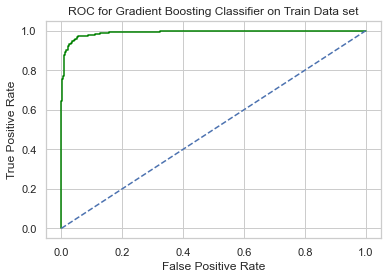

In [249]:
train_gbcl_fpr, train_gbcl_tpr,_=roc_curve(y_train_gbcl,gbcl.predict_proba(X_train_gbcl)[:,1])
plt.plot(train_gbcl_fpr,train_gbcl_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Gradient Boosting Classifier on Train Data set')
train_gbcl_auc=roc_auc_score(y_train_gbcl,gbcl.predict_proba(X_train_gbcl)[:,1])
print('Area under Curve Gradient Boosting Classifier is', train_gbcl_auc)

Area under Curve Gradient Boosting Classifier is 0.8804479985035539


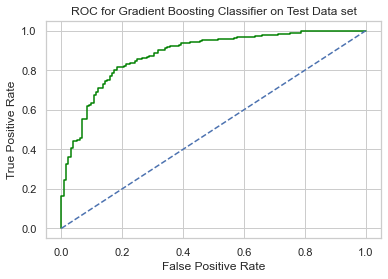

In [250]:
test_gbcl_fpr, test_gbcl_tpr,_=roc_curve(y_test_gbcl,gbcl.predict_proba(X_test_gbcl)[:,1])
plt.plot(test_gbcl_fpr,test_gbcl_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Gradient Boosting Classifier on Test Data set')
test_gbcl_auc=roc_auc_score(y_test_gbcl,gbcl.predict_proba(X_test_gbcl)[:,1])
print('Area under Curve Gradient Boosting Classifier is', test_gbcl_auc)

Feature: 0, Score: 0.14993
Feature: 1, Score: 0.05764
Feature: 2, Score: 0.05500
Feature: 3, Score: 0.18089
Feature: 4, Score: 0.29551
Feature: 5, Score: 0.15253
Feature: 6, Score: 0.09584
Feature: 7, Score: 0.01266


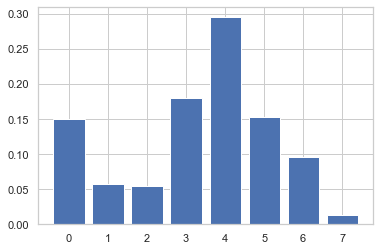

In [251]:
# get importance
importance = gbcl.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [252]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
nltk.download('punkt')
inaugural.fileids()
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
import numpy as np
import pandas as pd
import nltk
import random
import string

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\srivi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srivi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\srivi\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [253]:
!pip install wordcloud

In [254]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [255]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [256]:
print(inaugural.words('1941-Roosevelt.txt'))
print(inaugural.words ('1961-Kennedy.txt'))
print(inaugural.words ('1973-Nixon.txt'))

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]
['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]
['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]


In [257]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [258]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [259]:
df_Roosevelt= inaugural.raw('1941-Roosevelt.txt')
df_Kennedy = inaugural.raw('1961-Kennedy.txt')
df_Nixon = inaugural.raw('1973-Nixon.txt')

In [260]:
print(len(inaugural.raw('1941-Roosevelt.txt')))

7571


In [261]:
print(len(inaugural.raw('1961-Kennedy.txt')))
7618

7618


7618

In [262]:
print(len(inaugural.raw('1973-Nixon.txt')))

9991


In [263]:
print(len(inaugural.words('1941-Roosevelt.txt')))

1536


In [264]:
print(len(inaugural.words('1961-Kennedy.txt')))

1546


In [265]:
print(len(inaugural.words('1973-Nixon.txt')))

2028


In [266]:
print(len(inaugural.sents('1941-Roosevelt.txt')))

68


In [267]:
print(len(inaugural.sents('1961-Kennedy.txt')))

52


In [268]:
print(len(inaugural.sents('1973-Nixon.txt')))

69


In [269]:
import random
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srivi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [270]:
PS = PorterStemmer()

In [271]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["--"]) #,"us"])

In [274]:
Roosevelt_lower = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
Roosevelt_clean = [word for word in Roosevelt_lower if word not in stopwords]
Roosevelt_clean_stem = [PS.stem(word) for word in Roosevelt_clean]
Roosevelt_freq = nltk.FreqDist(Roosevelt_clean_stem)

In [273]:
Kennedy_lower = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
Kennedy_clean = [word for word in Kennedy_lower if word not in stopwords]
Kennedy_clean_stem = [PS.stem(word) for word in Kennedy_clean]
Kennedy_freq = nltk.FreqDist(Kennedy_clean_stem)

In [275]:
Nixon_lower = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
Nixon_clean = [word for word in Nixon_lower if word not in stopwords]
Nixon_clean_stem = [PS.stem(word) for word in Nixon_clean]
Nixon_freq = nltk.FreqDist(Nixon_clean_stem)

In [276]:
df_stopwords = pd.DataFrame(stopwords)
df_stopwords.head(5)

,0
0,i
1,me
2,my
3,myself
4,we


In [277]:
print("The top three words in Roosevelt's Speech are :\n",Roosevelt_freq.most_common(3))

The top three words in Roosevelt's Speech are :
 [('nation', 17), ('know', 10), ('peopl', 9)]


In [278]:
print("The top three words in Kennedy's Speech are :\n",Kennedy_freq.most_common(3))

The top three words in Kennedy's Speech are :
 [('let', 16), ('us', 12), ('power', 9)]


In [279]:
print("The top three words in Nixon's Speech are :\n",Nixon_freq.most_common(3))

The top three words in Nixon's Speech are :
 [('us', 26), ('let', 22), ('america', 21)]


In [280]:
df_roosevelt = pd.DataFrame({"Roosevelt":[inaugural.raw('1941-Roosevelt.txt')]})
df_kennedy =  pd.DataFrame({"Kennedy":[inaugural.raw('1961-Kennedy.txt')]})
df_nixon =  pd.DataFrame({"Nixon":[inaugural.raw('1973-Nixon.txt')]})

In [281]:
from wordcloud import WordCloud
words_roosevelt = ' '.join(df_roosevelt['Roosevelt'])
cleaned_word_roosevelt = " ".join([word for word in words_roosevelt.split()
                            if word not in stopwords
                            ])
cleaned_word_roosevelt

'On national day inauguration since 1789, people renewed sense dedication United States. In Washington\'s day task people create weld together nation. In Lincoln\'s day task people preserve Nation disruption within. In day task people save Nation institutions disruption without. To us come time, midst swift happenings, pause moment take stock recall place history been, rediscover may be. If not, risk real peril inaction. Lives nations determined count years, lifetime human spirit. The life man three-score years ten: little more, little less. The life nation fullness measure live. There men doubt this. There men believe democracy, form Government frame life, limited measured kind mystical artificial fate that, unexplained reason, tyranny slavery become surging wave future freedom ebbing tide. But Americans know true. Eight years ago, life Republic seemed frozen fatalistic terror, proved true. We midst shock acted. We acted quickly, boldly, decisively. These later years living years frui

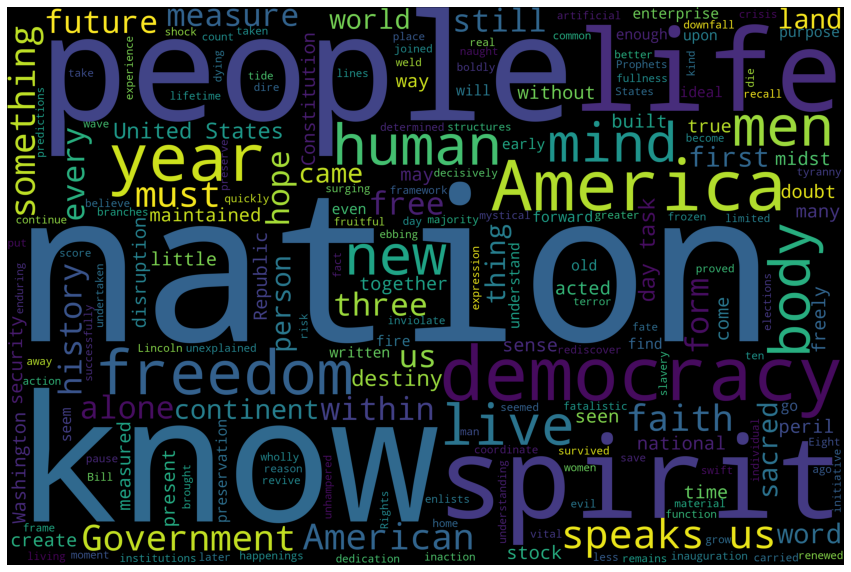

In [282]:
from wordcloud import WordCloud
words_roosevelt = ' '.join(df_roosevelt['Roosevelt'])
cleaned_word_roosevelt = " ".join([word for word in words_roosevelt.split()
                            if word not in stopwords
                            ])
wordcloud_roosevelt = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(cleaned_word_roosevelt)
plt.figure(1,figsize=(15,12))
plt.imshow(wordcloud_roosevelt)
plt.axis('off')
plt.show()

In [283]:
from wordcloud import WordCloud
words_kennedy = ' '.join(df_kennedy['Kennedy'])
cleaned_word_kennedy = " ".join([word for word in words_kennedy.split()
                            if word not in stopwords
                            ])
cleaned_word_kennedy

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, observe today victory party, celebration freedom symbolizing end, well beginning signifying renewal, well change. For I sworn I Almighty God solemn oath forebears l prescribed nearly century three quarters ago. The world different now. For man holds mortal hands power abolish forms human poverty forms human life. And yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state, hand God. We dare forget today heirs first revolution. Let word go forth time place, friend foe alike, torch passed new generation Americans born century, tempered war, disciplined hard bitter peace, proud ancient heritage unwilling witness permit slow undoing human rights Nation always committed, committed today home around world. Let every nation know, whether wishes us well ill, shall pay price, bear burden, meet

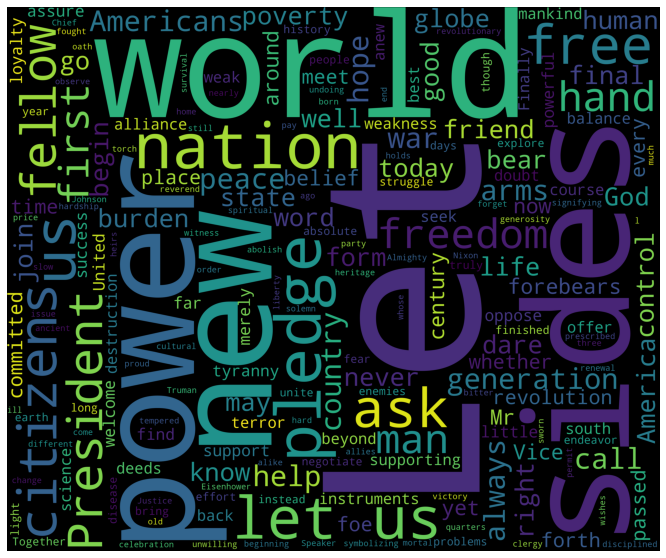

In [284]:
from wordcloud import WordCloud
words_kennedy = ' '.join(df_kennedy['Kennedy'])
cleaned_word_kennedy = " ".join([word for word in words_kennedy.split()
                            if word not in stopwords
                            ])
wordcloud_kennedy = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_kennedy)
plt.figure(1,figsize=(12,10))
plt.imshow(wordcloud_kennedy)
plt.axis('off')
plt.show()

In [285]:
from wordcloud import WordCloud
words_nixon = ' '.join(df_nixon['Nixon'])
cleaned_word_nixon = " ".join([word for word in words_nixon.split()
                            if word not in stopwords
                            ])
cleaned_word_nixon

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, fellow citizens great good country share together: When met four years ago, America bleak spirit, depressed prospect seemingly endless war abroad destructive conflict home. As meet today, stand threshold new era peace world. The central question us is: How shall use peace? Let us resolve era enter postwar periods often been: time retreat isolation leads stagnation home invites new danger abroad. Let us resolve become: time great responsibilities greatly borne, renew spirit promise America enter third century nation. This past year saw far-reaching results new policies peace. By continuing revitalize traditional friendships, missions Peking Moscow, able establish base new durable pattern relationships among nations world. Because America\'s bold initiatives, 1972 long remembered year greatest progress since end World War II toward lasting peace world. The peace seek world flimsy peace merely interlude wa

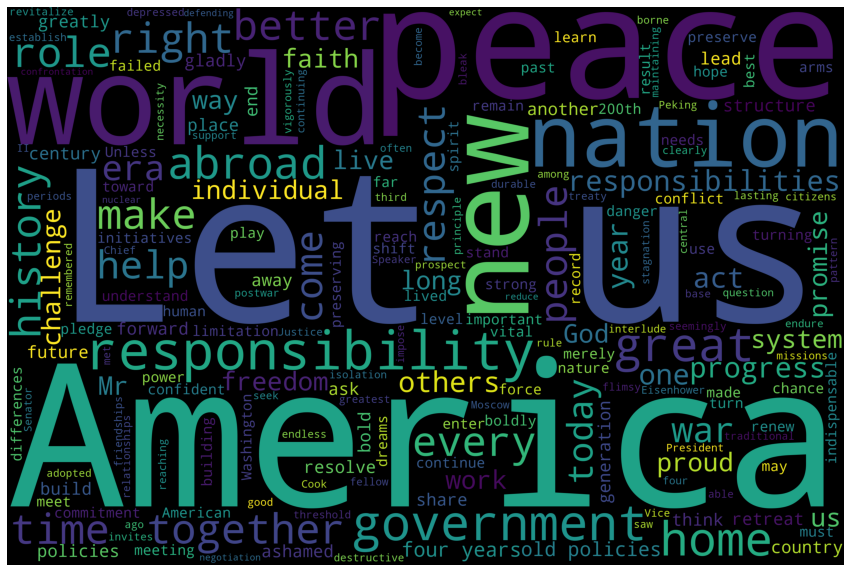

In [286]:
from wordcloud import WordCloud
words_nixon = ' '.join(df_nixon['Nixon'])
cleaned_word_nixon = " ".join([word for word in words_nixon.split()
                            if word not in stopwords
                            ])
wordcloud_nixon = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(cleaned_word_nixon)
plt.figure(1,figsize=(15,12))
plt.imshow(wordcloud_nixon)
plt.axis('off')
plt.show()